In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import platform


warnings.filterwarnings('ignore')

In [68]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [69]:
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/Malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name,size=8)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic',size=8)
#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [70]:
df_power= pd.read_csv('C:/Users/admin/Desktop/스프린트1/최종광주_시군구_업종별_전력사용량.csv',encoding='cp949',index_col=[0])
df_people = pd.read_csv('C:/Users/admin/Desktop/스프린트1/광주광역시_자치구별 인구밀도 현황_20220331.csv',encoding='cp949')

In [71]:
df_people=df_people[['시군구','인구(명)','인구밀도(km^2)']]
df_people

,시군구,인구(명),인구밀도(km^2)
0,동구,103470,2098.357331
1,서구,291231,6097.801508
2,남구,215575,3534.595835
3,북구,427114,3551.292924
4,광산구,404221,1814.358813


In [72]:
df_power['년도'] = df_power['년도'].astype(str)
df_power['년도'] = df_power['년도'].apply(lambda x: pd.to_datetime(str(x),format='%Y%m'))
df_power['year'] = df_power['년도'].dt.year
df_power['month'] = df_power['년도'].dt.month
df_power.reset_index(drop=True,inplace=True)
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   년도             956 non-null    datetime64[ns]
 1   지역             956 non-null    object        
 2   시군구            956 non-null    object        
 3   계약구분           956 non-null    object        
 4   고객수            956 non-null    object        
 5   사용량(kWh)       956 non-null    object        
 6   전기요금(원)        956 non-null    object        
 7   평균판매단가(원/kWh)  956 non-null    float64       
 8   year           956 non-null    int64         
 9   month          956 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 74.8+ KB


In [73]:
df_power['사용량(kWh)']=df_power['사용량(kWh)'].str.replace(',','').str.strip().astype('int64')
df_power['고객수']=df_power['고객수'].str.replace(',','').str.strip().astype('int64')

In [74]:
gu_total = df_power[df_power['계약구분']=='합계']
gwangju=gu_total.groupby('시군구')['사용량(kWh)','고객수'].sum()
gwangju=gwangju.reset_index()
gwangju['사용량/고객수']=gwangju['사용량(kWh)']/gwangju['고객수']
gwangju

,시군구,사용량(kWh),고객수,사용량/고객수
0,광산구,7282620910,3262260,2232.385190
1,남구,1524981832,1961470,777.468853
2,동구,1283418916,1469388,873.437728
3,북구,4746165591,4131324,1148.824346
4,서구,2735228456,2162880,1264.623306


In [75]:
gu_total11 = gwangju.merge(df_people,on='시군구',how='outer')
gu_total11

,시군구,사용량(kWh),고객수,사용량/고객수,인구(명),인구밀도(km^2)
0,광산구,7282620910,3262260,2232.385190,404221,1814.358813
1,남구,1524981832,1961470,777.468853,215575,3534.595835
2,동구,1283418916,1469388,873.437728,103470,2098.357331
3,북구,4746165591,4131324,1148.824346,427114,3551.292924
4,서구,2735228456,2162880,1264.623306,291231,6097.801508


In [129]:
# 구별 인구밀도와 전력사용량 데이터프레임 상관관계 표현
corr_gu = gu_total11.corr()
corr_gu

,사용량(kWh),고객수,사용량/고객수,인구(명),인구밀도(km^2)
사용량(kWh),1.000000,0.784801,0.918839,0.861066,-0.307960
고객수,0.784801,1.000000,0.486899,0.937096,-0.083466
사용량/고객수,0.918839,0.486899,1.000000,0.655454,-0.281897
인구(명),0.861066,0.937096,0.655454,1.000000,0.083213
인구밀도(km^2),-0.307960,-0.083466,-0.281897,0.083213,1.000000


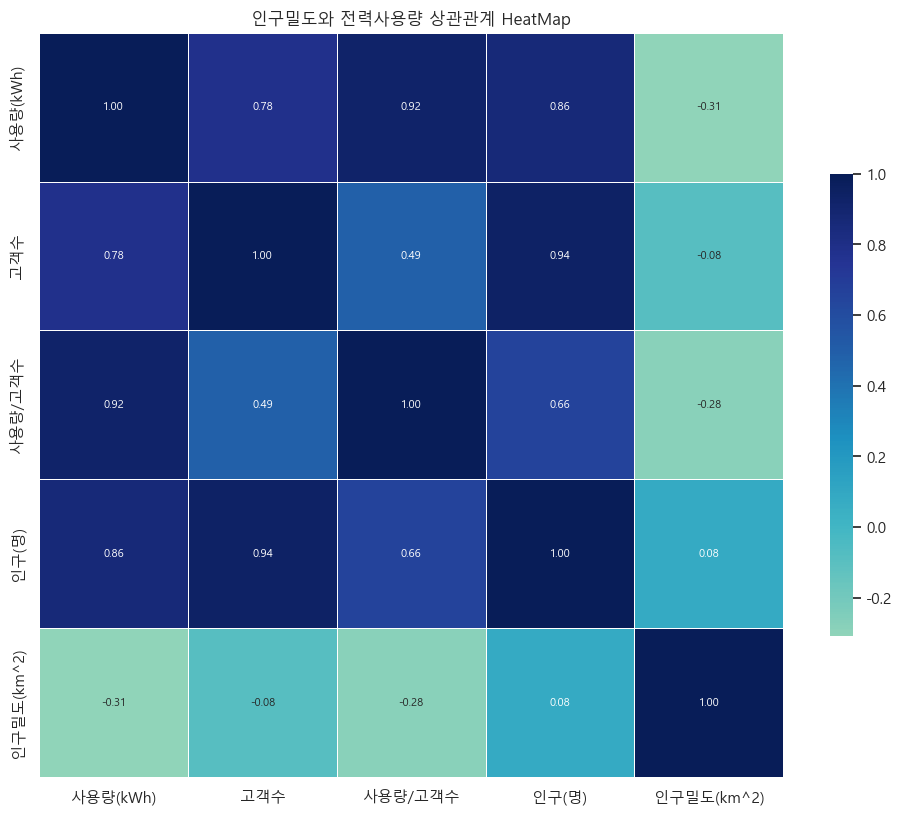

In [77]:
# 인구밀도와 전력사용량 상관관계 HeatMap
f, ax = plt.subplots(figsize=(12, 12))
corr = gu_total11.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_gu, dtype='bool')
mask[np.triu_indices_from(mask)] = False

g = sns.heatmap(corr_gu, cmap='YlGnBu', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("인구밀도와 전력사용량 상관관계 HeatMap")
plt.show()

In [78]:
import folium,json

In [79]:
# jsonfile = open('C:/Users/admin/Desktop/전력빅데이터/HangJeongDong_ver20230101.geojson','r',encoding='utf-8').read()
jsonfile = open('C:/Users/admin/Desktop/전력빅데이터/TL_SCCO_SIG.json','r',encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_gwangju = {'type': 'FeatureCollection'}
jsondata_pick = []
jsondata_gu = []
for idx in jsondata['features']:
    # 법정동코드 광산구 29200 남구 29155 동구 29110 북구 29170  서구 29140
    if (idx['properties']['SIG_CD'] == '29200')|(idx['properties']['SIG_CD'] == '29155')|(idx['properties']['SIG_CD'] == '29110')|(idx['properties']['SIG_CD'] == '29170')|(idx['properties']['SIG_CD'] == '29140'):
        print(idx)
        dong = idx['properties']['SIG_KOR_NM'].split()[-1].strip()
        print(dong)
        jsondata_gu.append(dong)
        idx['id'] = dong
        jsondata_pick.append(idx)
jsondata_gwangju['features'] = jsondata_pick

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[127.00431802111373, 35.12129063722381], [126.98895069186915, 35.09498758315934], [126.93599500175853, 35.07448169707949], [126.91922340853777, 35.09153166163333], [126.92886536255442, 35.125928989325935], [126.90974273852488, 35.14918948831353], [126.90715348906502, 35.15144018877212], [126.95522913082353, 35.152209988863795], [127.00431802111373, 35.12129063722381]]]}, 'properties': {'SIG_CD': '29110', 'SIG_ENG_NM': 'Dong-gu', 'SIG_KOR_NM': '동구'}}
동구
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.90715348906502, 35.15144018877212], [126.90974273852488, 35.14918948831353], [126.88862546053038, 35.1215898570284], [126.81985704612588, 35.09107543698663], [126.80252481602118, 35.09347727464407], [126.82932300479948, 35.140598940256076], [126.83874984951383, 35.17843442954697], [126.88193309184308, 35.170518744996606], [126.90715348906502, 35.15144018877212]]]}, 'properties': {'SIG_CD': '29140'

### 지도 시각화
->광주 전력사용량 

In [80]:
#  광주 전력사용량 지도 시각화
map = folium.Map((35.2147680757968,126.68902856451213),height = 500, width= 600, zoom_start=10)

folium.Choropleth(geo_data = jsondata_gwangju,
                  data = gwangju,
                  columns=['시군구','사용량/고객수'],
                  key_on='feature.id',
                  legend_name='광주 전력사용량',
                  bins=10,fill_color='OrRd').add_to(map)
map

-> 광주광역시 인구밀도

In [81]:
#  광주 인구밀도 지도 시각화
plt.figure(figsize=(5,5))
map = folium.Map((35.2147680757968,126.68902856451213),height = 500, width= 600,zoom_start=10)

folium.Choropleth(geo_data = jsondata_gwangju,
                  data = gu_total11,
                  columns=['시군구','인구밀도(km^2)'],
                  tooltip='아',
                  key_on='feature.id',
                  legend_name='광주 인구밀도',
                  bins=10,fill_color='OrRd').add_to(map)
map

<Figure size 500x500 with 0 Axes>

In [82]:
e_df = pd.read_excel('C:/Users/admin/Desktop/스프린트1/광주광역시 전력사용량 2018_2022.xlsx',index_col=[0])

In [83]:
e_ind_df = e_df[e_df['계약종별']=='산업용']
e_farm_df=e_df[e_df['계약종별']=='농사용']
e_edu_df = e_df[e_df['계약종별']=='교육용']
e_house_df = e_df[e_df['계약종별']=='주택용']

In [84]:
e_ind_df = e_ind_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_farm_df= e_farm_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_house_df = e_house_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_edu_df = e_edu_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                        var_name='월별',
                        value_name='전력사용량')

e_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      300 non-null    int64 
 1   시도      300 non-null    object
 2   시군구     300 non-null    object
 3   계약종별    300 non-null    object
 4   월별      300 non-null    object
 5   전력사용량   300 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [85]:
#산업용
ind_east = e_ind_df[e_ind_df['시군구']=='동구']
ind_west = e_ind_df[e_ind_df['시군구']=='서구']
ind_south = e_ind_df[e_ind_df['시군구']=='남구']
ind_north = e_ind_df[e_ind_df['시군구']=='북구']
ind_gwang = e_ind_df[e_ind_df['시군구']=='광산구']

#교육용
edu_east = e_edu_df[e_edu_df['시군구']=='동구']
edu_west = e_edu_df[e_edu_df['시군구']=='서구']
edu_south = e_edu_df[e_edu_df['시군구']=='남구']
edu_north = e_edu_df[e_edu_df['시군구']=='북구']
edu_gwang = e_edu_df[e_edu_df['시군구']=='광산구']

#농업용
farm_east = e_farm_df[e_farm_df['시군구']=='동구']
farm_west = e_farm_df[e_farm_df['시군구']=='서구']
farm_south = e_farm_df[e_farm_df['시군구']=='남구']
farm_north = e_farm_df[e_farm_df['시군구']=='북구']
farm_gwang = e_farm_df[e_farm_df['시군구']=='광산구']


#주택용
h_east = e_house_df[e_house_df['시군구']=='동구']
h_west = e_house_df[e_house_df['시군구']=='서구']
h_south = e_house_df[e_house_df['시군구']=='남구']
h_north = e_house_df[e_house_df['시군구']=='북구']
h_gwang = e_house_df[e_house_df['시군구']=='광산구']

In [86]:
month_order = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

h_east['월별'] = pd.Categorical(h_east['월별'], categories=month_order, ordered=True)
h_west['월별'] = pd.Categorical(h_west['월별'], categories=month_order, ordered=True)
h_south['월별'] = pd.Categorical(h_south['월별'], categories=month_order, ordered=True)
h_north['월별'] = pd.Categorical(h_north['월별'], categories=month_order, ordered=True)

In [87]:
df = pd.read_excel('C:/Users/admin/Desktop/스프린트1/통합 문서1.xlsx',index_col=[0])
df.head()

,연도,시도,시군구,계약종별,연도 합
31,2018,광주광역시,광산구,합 계,3488543890
71,2019,광주광역시,광산구,합 계,3414502016
111,2020,광주광역시,광산구,합 계,3362897096
151,2021,광주광역시,광산구,합 계,3637352175
191,2022,광주광역시,광산구,합 계,3645268735


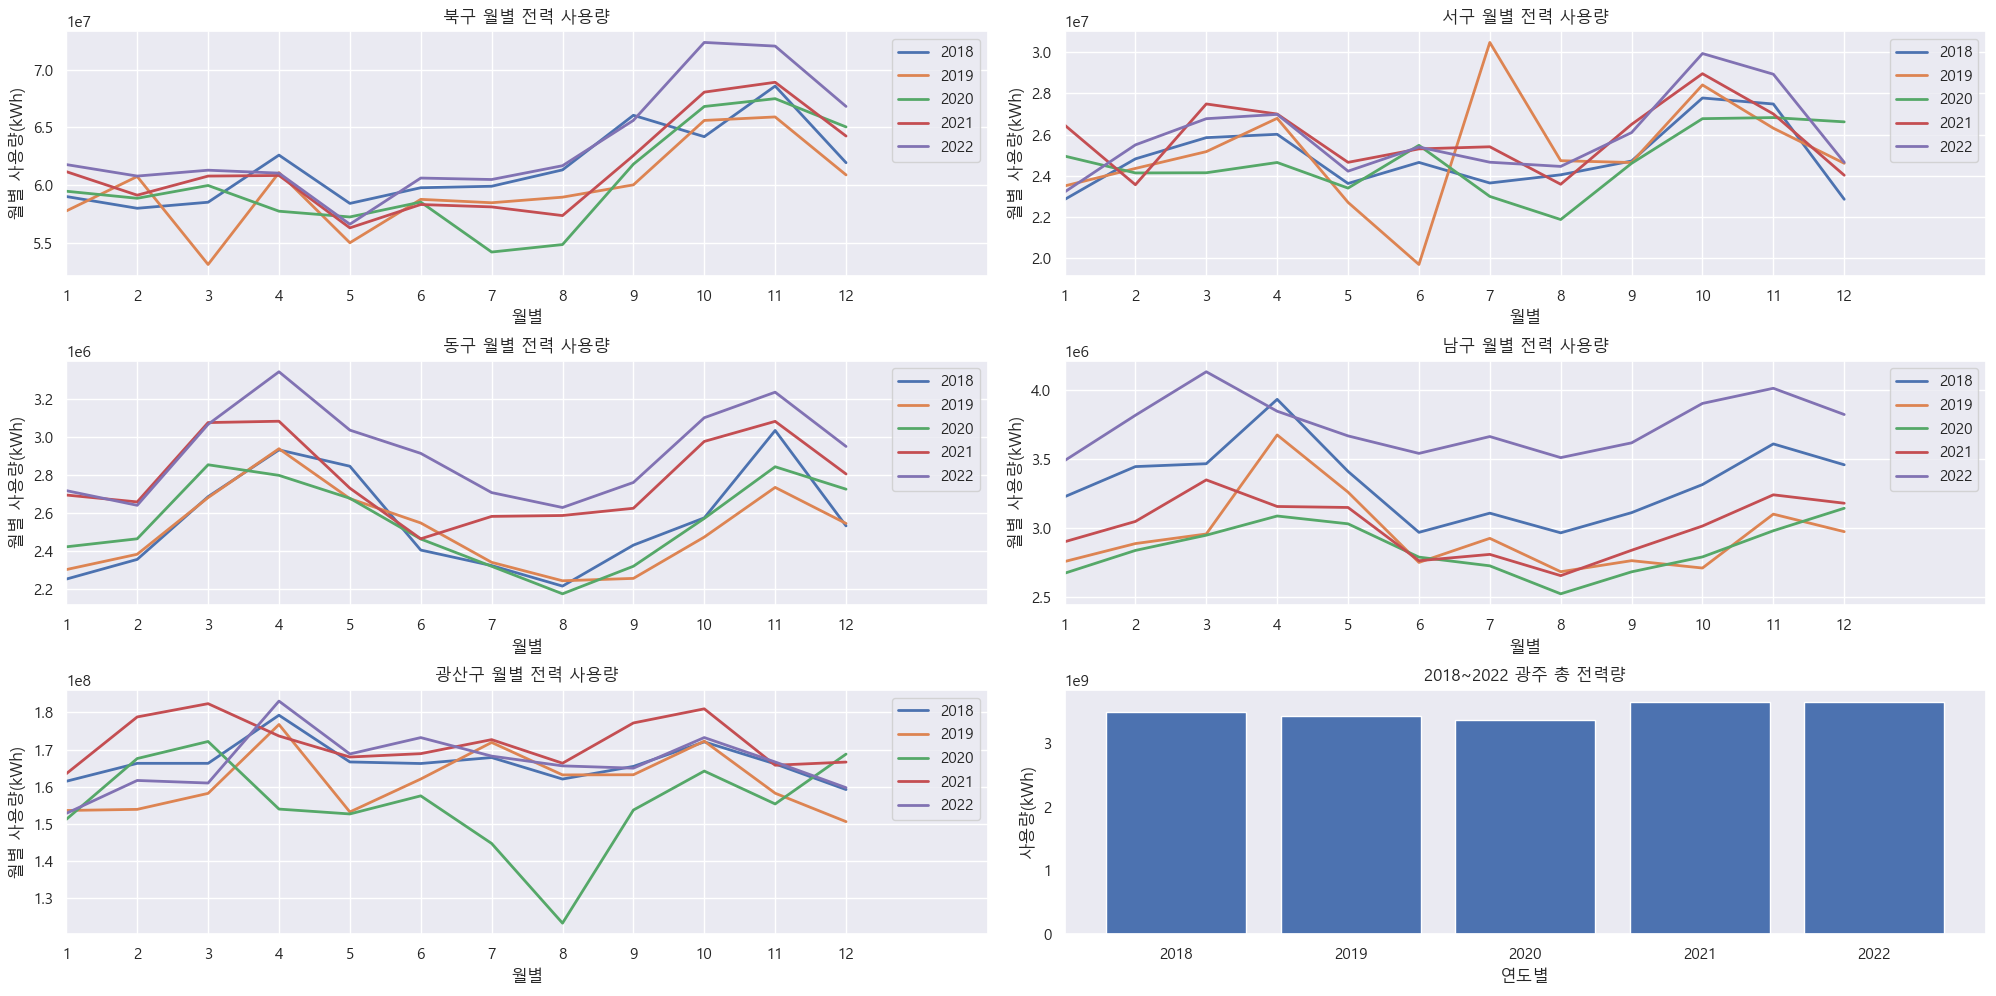

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

ind_north_df = ind_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 월별 전력 사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

ax = axes[0, 0]
ind_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
)
ax.legend(loc=1)
plt.tight_layout()
plt.grid()

ind_west_df = ind_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 월별 전력 사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

ax = axes[0, 1]
ind_west_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
ax.legend(loc=1)
plt.grid()

ind_east_df = ind_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 월별 전력 사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

ax = axes[1, 0]
ind_east_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
ax.legend(loc=1)
plt.grid()

ind_south_df = ind_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 월별 전력 사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

ax = axes[1, 1]
ind_south_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
ax.legend(loc=1)
plt.grid()

ind_gwang_df = ind_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 월별 전력 사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

ax = axes[2, 0]
ind_gwang_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
ax.legend(loc=1)
plt.grid()

ind_df = df.pivot_table(columns='연도',values='연도 합')

ax = axes[2, 1]
plt.bar(df['연도'], df['연도 합'])

# 그래프 제목과 x, y 축 라벨 설정
plt.title('2018~2022 광주 총 전력량')
plt.xlabel('연도별')
plt.ylabel('사용량(kWh)')

plt.tight_layout()
plt.show()

In [89]:
df_2 = pd.read_excel('C:/Users/admin/Desktop/스프린트1/수정된 1년치 총 합계 (1).xlsx')
df_2

,연도,주택,농사,교육,산업,합계,비율(주택),비율(농사),비율(교육),비율(산업)
0,2018,572594730,44268945,59973643,1998991788,2675829106,21.398778,1.654401,2.241311,74.705510
1,2019,574824654,43099103,57875623,1937191566,2612990946,21.998724,1.649416,2.214919,74.136941
2,2020,612635003,43446254,47402021,1865319845,2568803123,23.849045,1.691303,1.845296,72.614356
3,2021,635234560,46066634,55949985,2064643990,2801895169,22.671603,1.644124,1.996862,73.687410
4,2022,647391525,55001356,58989991,1999018832,2760401704,23.452801,1.992513,2.137007,72.417679


In [90]:
df_2['총 전력량'] = df_2['주택'] + df_2['농사'] + df_2['교육'] + df_2['산업']

df_sum = df_2.groupby('연도')['총 전력량'].sum()
df_percent = df_2[['연도', '주택', '농사', '교육', '산업']]
df_percent = df_2[['연도', '주택', '농사', '교육', '산업']].copy()
df_percent[['주택', '농사', '교육', '산업']] = df_percent[['주택', '농사', '교육', '산업']].div(df_2['총 전력량'], axis=0) * 100

# Plotly Express로 그래프 그리기
fig = px.bar(df_percent, x='연도', y=['주택', '농사', '교육', '산업'], barmode='group', title='광산구 총 전력 연도별 현황',labels='합계',text_auto=True)


fig.update_layout(
    yaxis=dict(title='전력량(단위: %)', titlefont_size=16),
    xaxis=dict(title='연도', titlefont_size=16),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

In [91]:
tmp_elc = pd.read_csv('C:/Users/admin/Desktop/스프린트1/광주_기온_전력량_2018~2022.csv', index_col=[0], parse_dates=True)

In [92]:
tmp_elc.describe()

,year,month,평균기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10),합계 일사량(MJ/m2),전력사용량
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,2020.000000,6.500000,14.733333,70.483333,110.241667,1.475000,5.371667,465.740167,7.333089e+08
std,1.426148,3.481184,8.839447,10.371885,128.020526,0.238374,1.091584,131.660543,6.476418e+07
min,2018.000000,1.000000,-0.200000,52.000000,0.300000,1.000000,3.300000,242.930000,6.108654e+08
25%,2019.000000,3.750000,7.625000,62.000000,33.675000,1.300000,4.700000,345.280000,6.854462e+08
50%,2020.000000,6.500000,15.300000,69.000000,81.650000,1.500000,5.050000,457.860000,7.171879e+08
75%,2021.000000,9.250000,22.950000,78.250000,131.250000,1.600000,6.200000,572.962500,7.828010e+08
max,2022.000000,12.000000,28.400000,91.000000,738.100000,2.200000,8.700000,770.490000,8.939148e+08


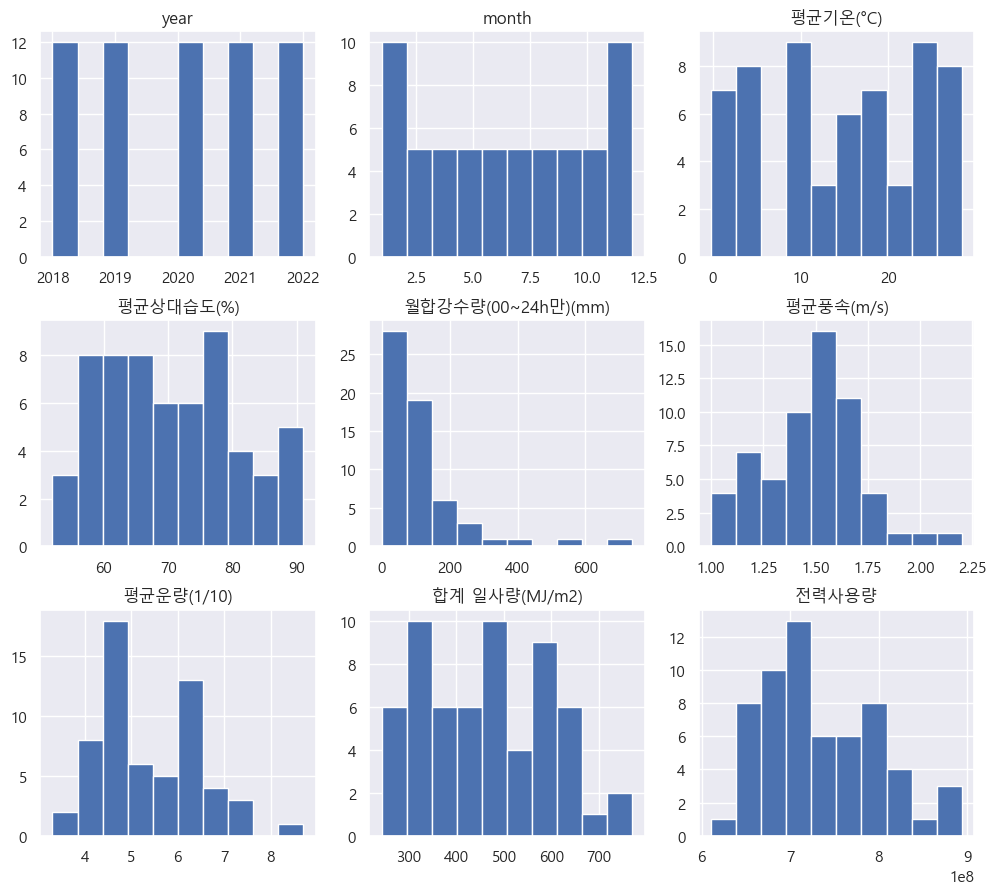

In [93]:
tmp_elc.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

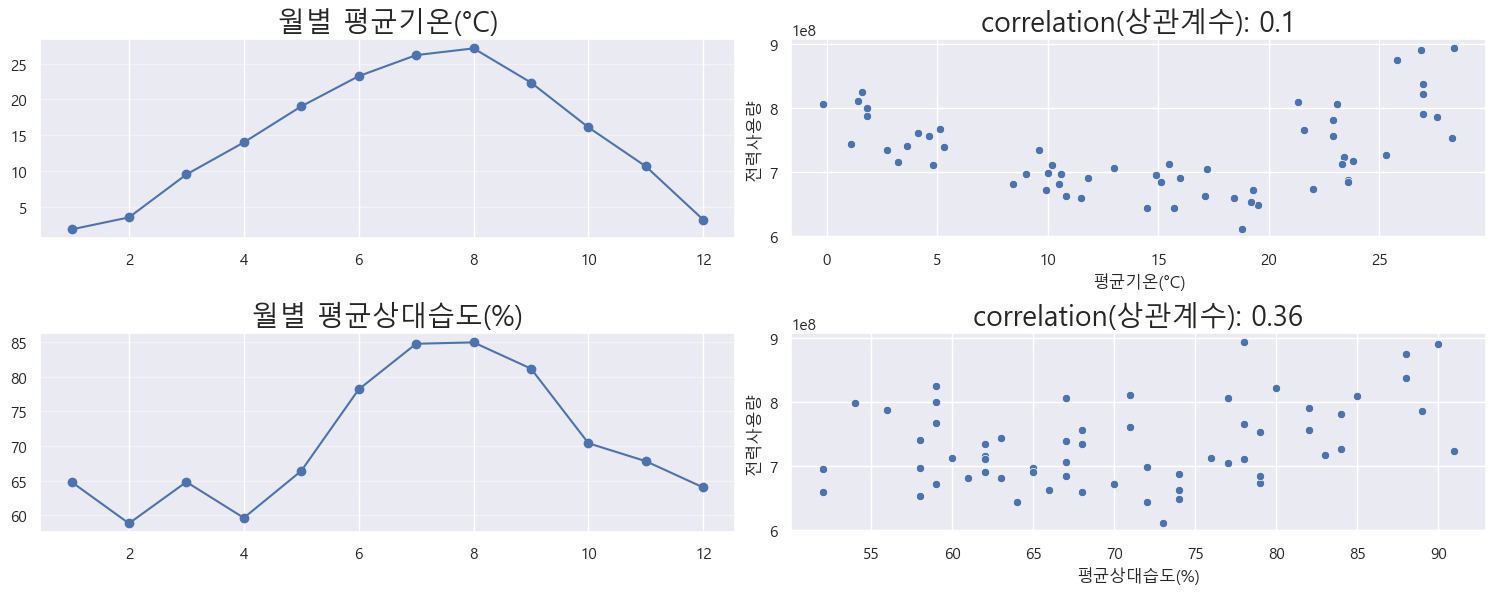

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(tmp_elc.groupby('month')['평균기온(°C)'].mean(),marker='o')
plt.grid(axis='y',linestyle='-', alpha=0.4)
plt.title('월별 평균기온(°C)', size=20)


plt.subplot(2,2,2)
correlation = tmp_elc['전력사용량'].corr(tmp_elc['평균기온(°C)'])
sns.scatterplot(x=tmp_elc['평균기온(°C)'], y=tmp_elc['전력사용량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("평균기온(°C)",fontsize=12)
plt.ylabel("전력사용량",fontsize=12)

plt.subplot(2,2,3)
plt.plot(tmp_elc.groupby('month')['평균상대습도(%)'].mean(),marker='o')
plt.grid(axis='y',linestyle='-', alpha=0.4)
plt.title('월별 평균상대습도(%)', size=20)


plt.subplot(2,2,4)
correlation = tmp_elc['전력사용량'].corr(tmp_elc['평균상대습도(%)'])
sns.scatterplot(x=tmp_elc['평균상대습도(%)'], y=tmp_elc['전력사용량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("평균상대습도(%)",fontsize=12)
plt.ylabel("전력사용량",fontsize=12)
plt.tight_layout()
plt.show()

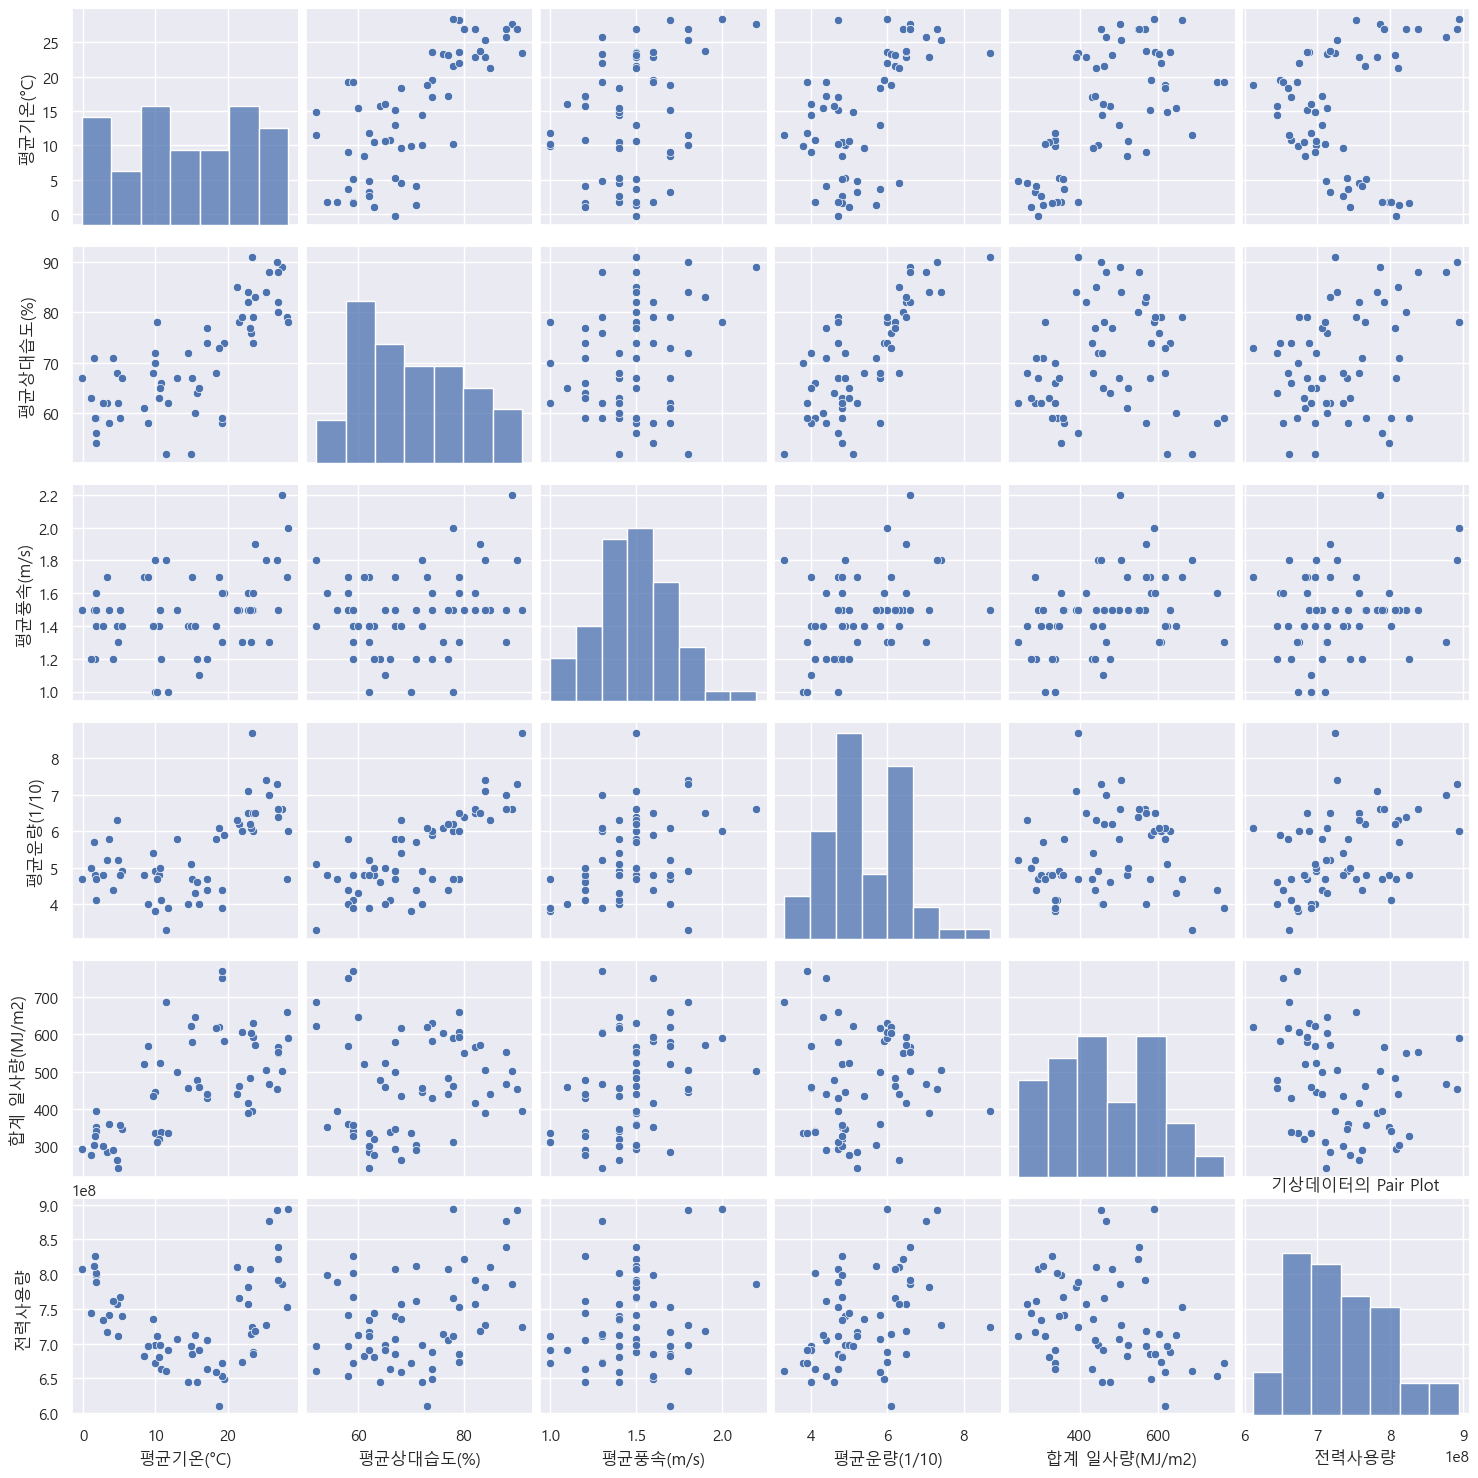

In [95]:
sns.pairplot(tmp_elc[['평균기온(°C)', '평균상대습도(%)',
       '평균풍속(m/s)', '평균운량(1/10)', '합계 일사량(MJ/m2)', '전력사용량']])
plt.title("기상데이터의 Pair Plot")
plt.show()

In [96]:
# 상관관계 도출
corr_matrix = tmp_elc.corr()
corr_matrix

,year,month,평균기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10),합계 일사량(MJ/m2),전력사용량
year,1.000000e+00,2.463352e-14,0.011563,0.008021,-0.101940,-0.284184,0.053348,0.000220,0.193831
month,2.463352e-14,1.000000e+00,0.267029,0.330708,0.110171,-0.309439,0.019848,-0.213216,-0.106893
평균기온(°C),1.156263e-02,2.670290e-01,1.000000,0.744309,0.603370,0.330281,0.576237,0.651962,0.097727
평균상대습도(%),8.020912e-03,3.307077e-01,0.744309,1.000000,0.666172,0.235997,0.763522,0.098129,0.357567
월합강수량(00~24h만)(mm),-1.019402e-01,1.101710e-01,0.603370,0.666172,1.000000,0.473290,0.627281,0.212266,0.235345
평균풍속(m/s),-2.841841e-01,-3.094391e-01,0.330281,0.235997,0.473290,1.000000,0.382195,0.375434,0.218270
평균운량(1/10),5.334849e-02,1.984832e-02,0.576237,0.763522,0.627281,0.382195,1.000000,0.066643,0.412896
합계 일사량(MJ/m2),2.202508e-04,-2.132165e-01,0.651962,0.098129,0.212266,0.375434,0.066643,1.000000,-0.272514
전력사용량,1.938308e-01,-1.068934e-01,0.097727,0.357567,0.235345,0.218270,0.412896,-0.272514,1.000000


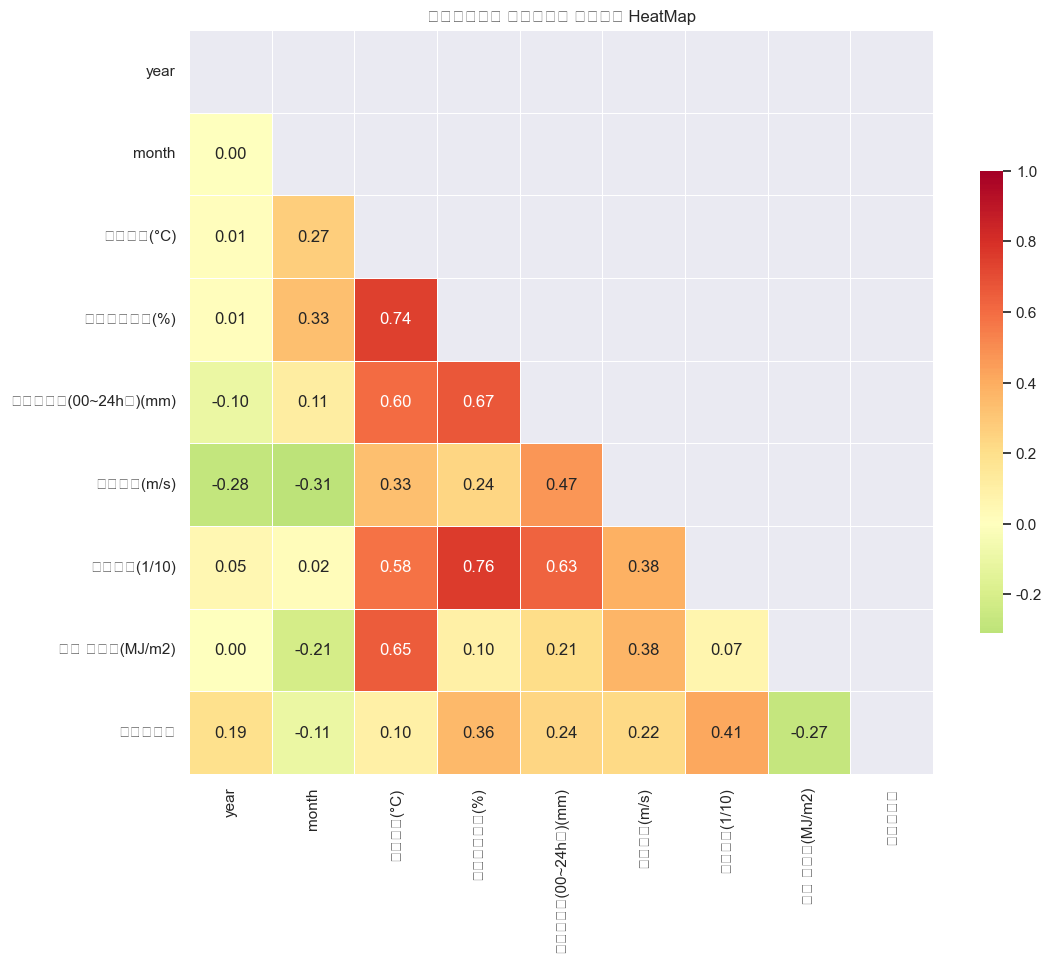

In [130]:
# 기상데이터와 전력사용량 상관관계 HeatMap
f, ax = plt.subplots(figsize=(12, 12))
corr = tmp_elc.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("기상데이터와 전력사용량 상관관계 HeatMap")
plt.show()

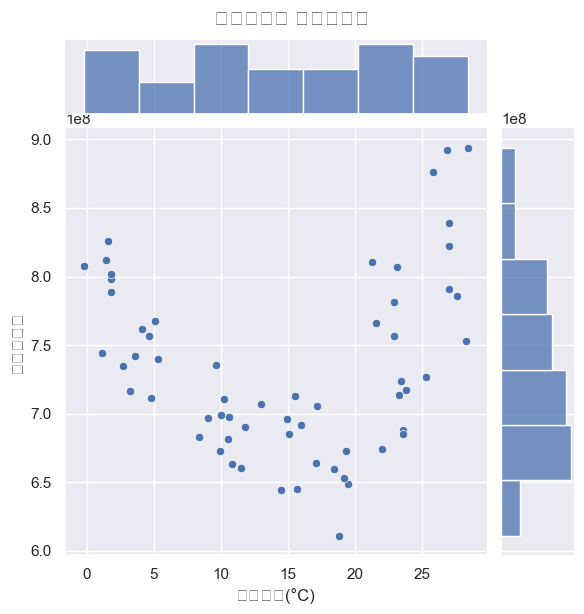

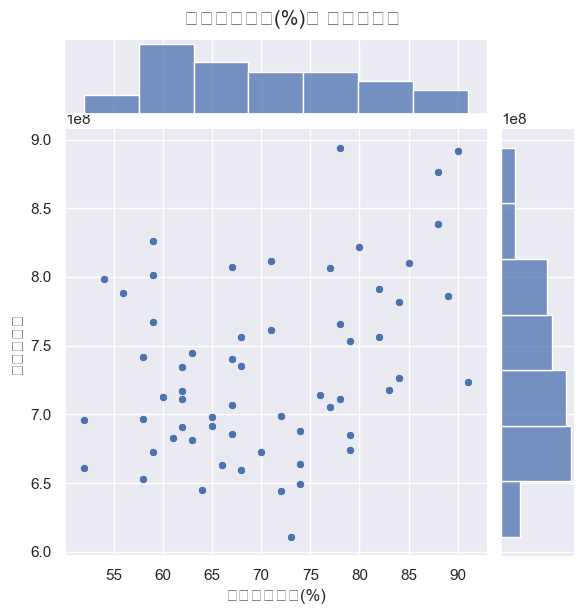

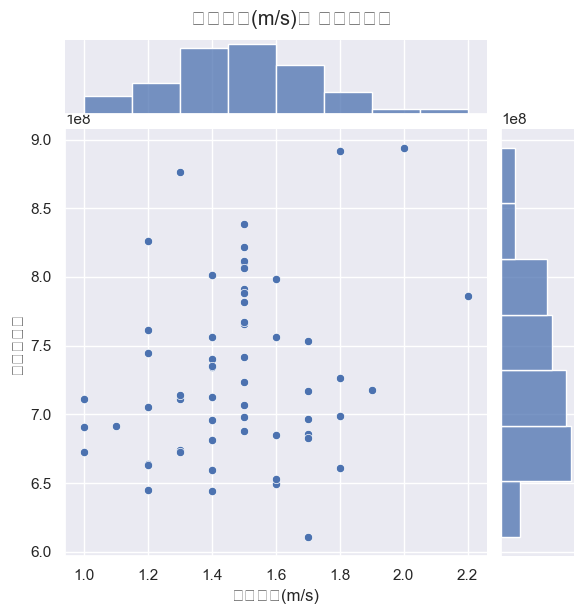

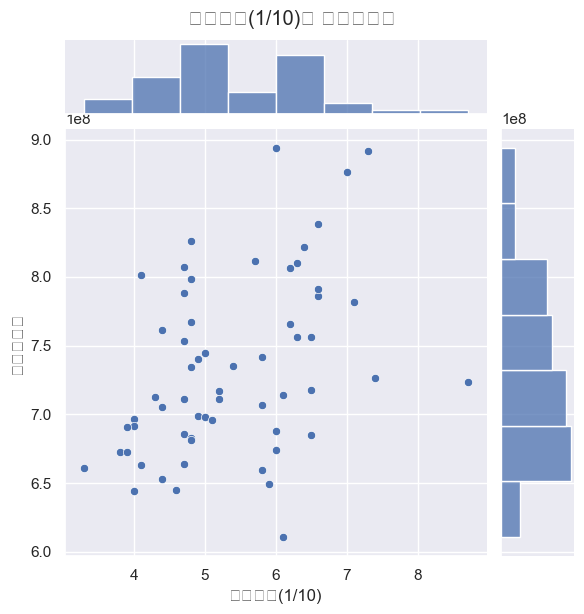

In [131]:
# 평균기온,상대습도,풍속,운량과 전력사용량 시각화
sns.jointplot(x="평균기온(°C)", y="전력사용량", data=tmp_elc)
plt.suptitle("평균기온과 전력사용량", y=1.02)

sns.jointplot(x="평균상대습도(%)", y="전력사용량", data=tmp_elc)
plt.suptitle("평균상대습도(%)와 전력사용량", y=1.02)


sns.jointplot(x="평균풍속(m/s)", y="전력사용량", data=tmp_elc)
plt.suptitle("평균풍속(m/s)과 전력사용량", y=1.02)

sns.jointplot(x="평균운량(1/10)", y="전력사용량", data=tmp_elc)
plt.suptitle("평균운량(1/10)과 전력사용량", y=1.02)
plt.show()

In [99]:
tmp_elc['일시'] = pd.to_datetime(tmp_elc['일시'],format='%Y-%m-%d')
tmp_elc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   일시                  60 non-null     datetime64[ns]
 1   year                60 non-null     int64         
 2   month               60 non-null     int64         
 3   평균기온(°C)            60 non-null     float64       
 4   평균상대습도(%)           60 non-null     int64         
 5   월합강수량(00~24h만)(mm)  60 non-null     float64       
 6   평균풍속(m/s)           60 non-null     float64       
 7   평균운량(1/10)          60 non-null     float64       
 8   합계 일사량(MJ/m2)       60 non-null     float64       
 9   전력사용량               60 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 7.2 KB


<AxesSubplot:xlabel='전력사용량', ylabel='Density'>

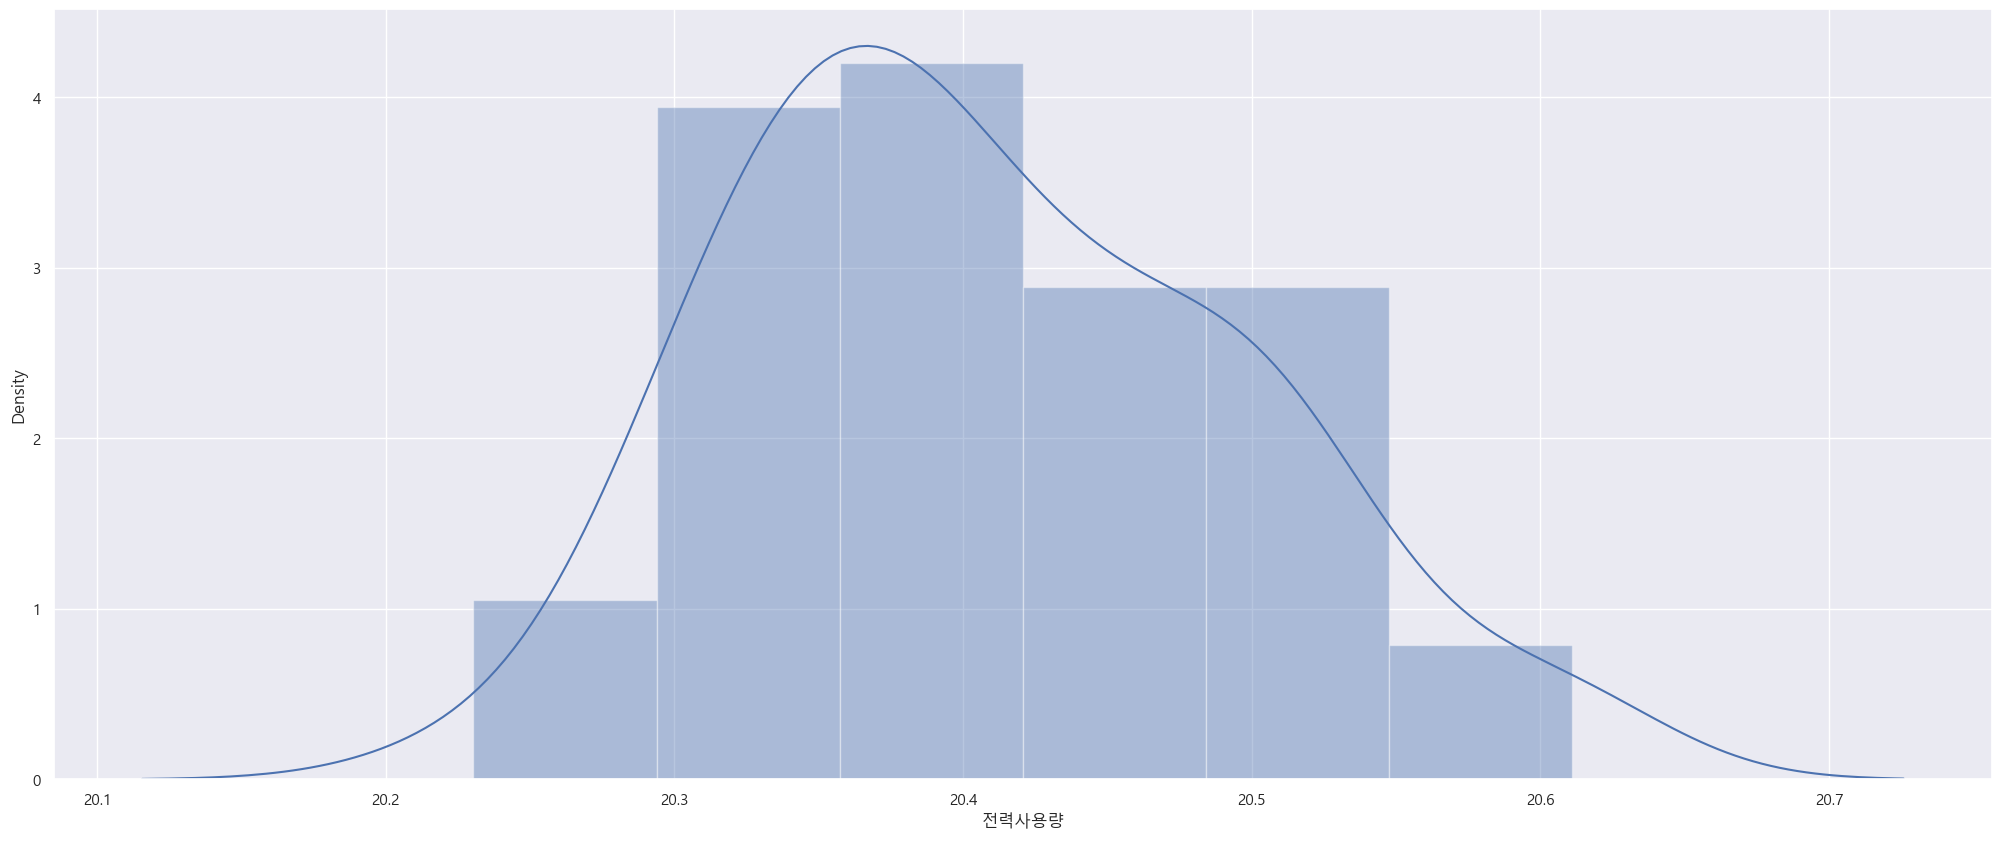

In [100]:
log_SalePrice = np.log1p(tmp_elc['전력사용량'])
sns.distplot(log_SalePrice)

In [101]:
tmp_elc_ohe = pd.get_dummies(tmp_elc)

In [102]:
tmp_elc_ohe.set_index('일시',inplace=True)

In [103]:
tmp_elc_ohe.head()

,year,month,평균기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10),합계 일사량(MJ/m2),전력사용량
일시,,,,,,,,,
2018-01-01,2018,1,-0.2,67,38.8,1.5,4.7,292.12,807535917
2018-02-01,2018,2,1.8,54,22.0,1.6,4.8,352.83,798506369
2018-03-01,2018,3,10.0,72,115.8,1.8,4.9,445.57,698659795
2018-04-01,2018,4,15.1,67,127.4,1.7,4.7,579.66,685492936
2018-05-01,2018,5,19.5,74,85.4,1.6,5.9,581.84,648944709


## 선형회귀 분석

In [104]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [128]:
# 선형회귀 모델 객체 생성
from sklearn.preprocessing import PolynomialFeatures

X = tmp_elc_ohe[['평균기온(°C)','평균상대습도(%)']]
y = tmp_elc_ohe['전력사용량']
model = LinearRegression()
a = PolynomialFeatures()
X = a.fit_transform(X)

model.fit(X, y)
# 모델 예측
y_pred = model.predict(X)

# 모델 성능 측정 (R-squared)
print('R-squared: ', model.score(X, y))

# # 모델 회귀 계수
# print('Coefficients: ', model.coef_)

# 모델 절편
print('Intercept: ', model.intercept_)

R-squared:  0.6641031733857756
Intercept:  1273888171.5706432


-> 선형회귀 실제값과 예측값 비교

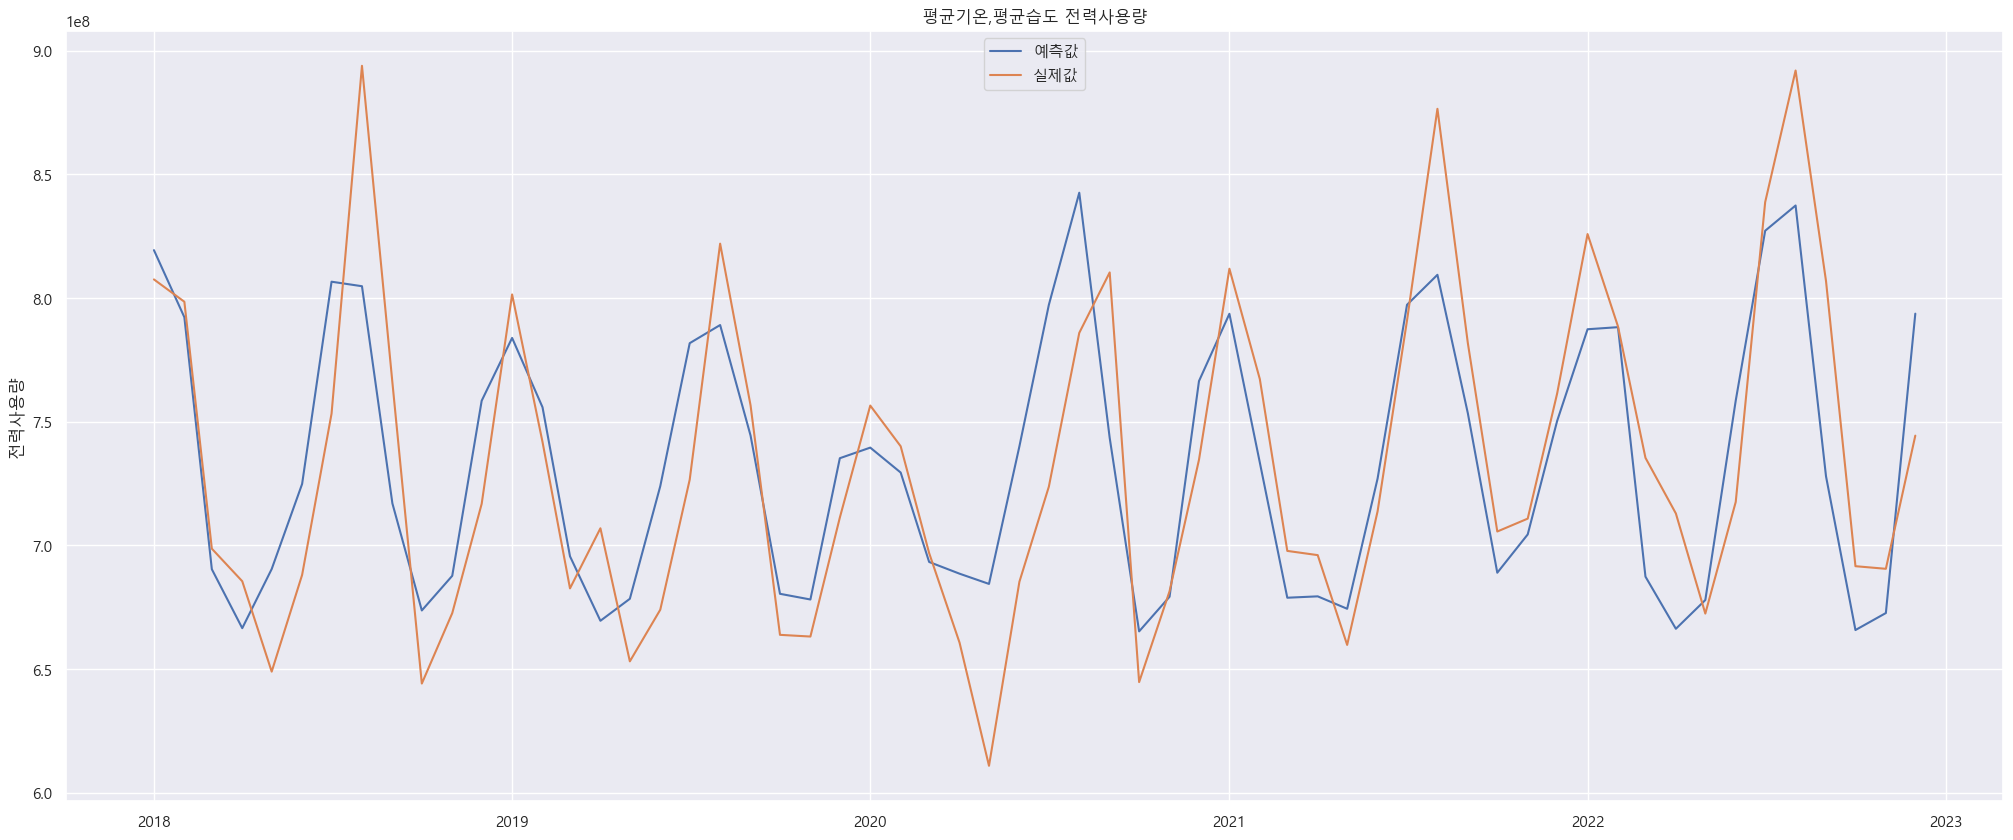

In [106]:
plt.plot(y.index,y_pred,label='예측값')
plt.plot(y,label='실제값')
plt.ylabel('전력사용량')
plt.title('평균기온,평균습도 전력사용량')
plt.legend(loc='upper center')
plt.show()

In [107]:
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE : ',rmse)
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [132]:
# 전력사용량에대한 선형회귀, rideg,lasso 회귀분석 학습
y = tmp_elc_ohe['전력사용량']
X = tmp_elc_ohe.drop(columns=['전력사용량'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 156)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [109]:
def get_top_bottom_coef(model,n=10):
    coef = pd.Series(model.coef_,index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low

In [110]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), ncols = 3, nrows=1)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 concat으로 결합
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        # ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__,size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-128)   # direction = 'in' 글자 들여쓰기
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])


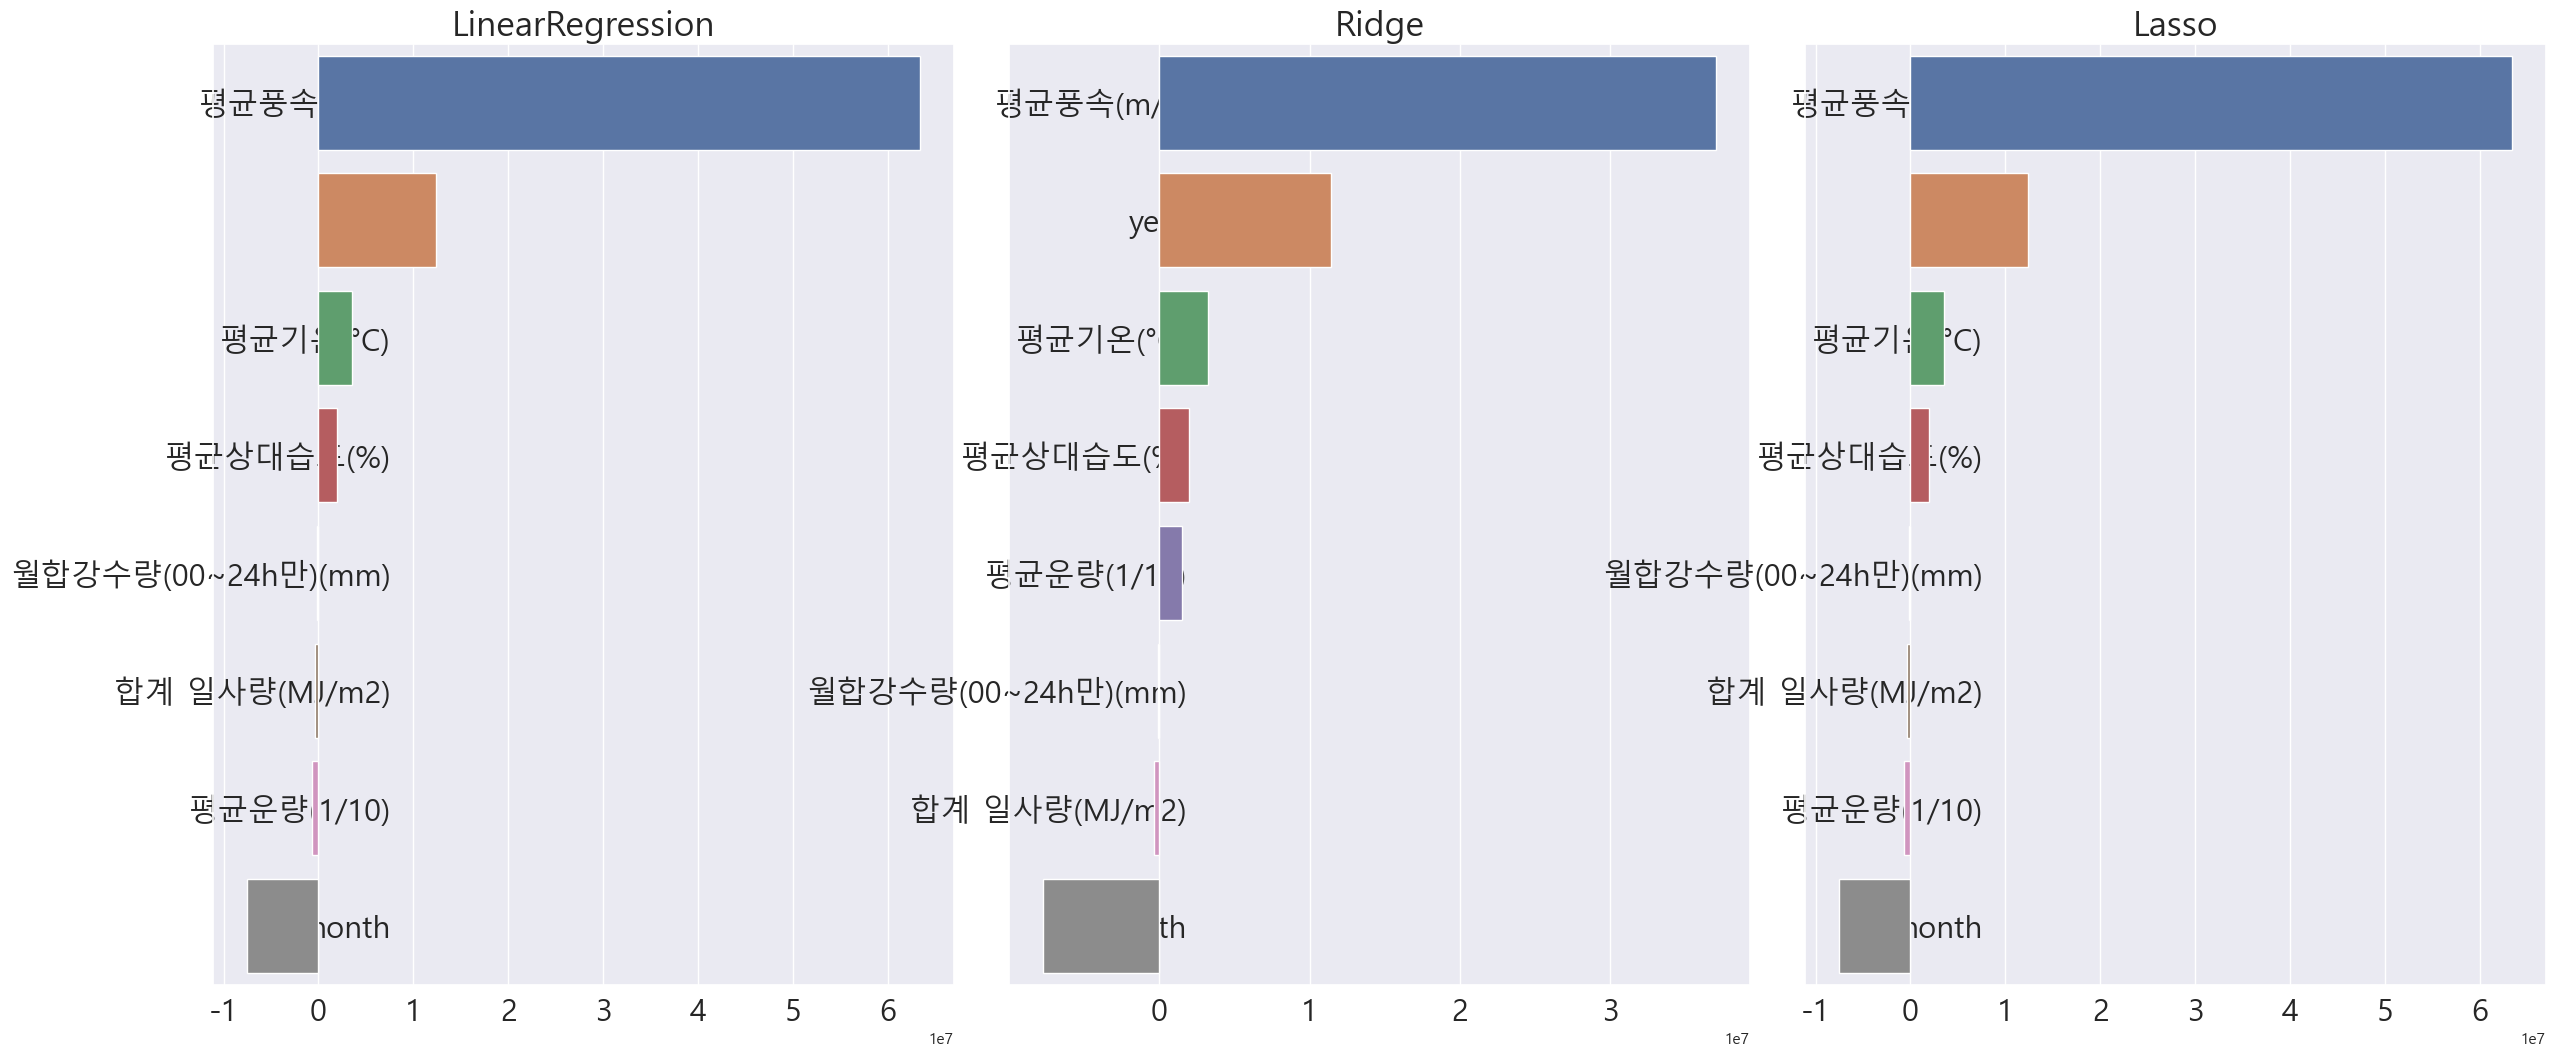

In [111]:
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [112]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    
    for model in models:
    # 분할하지 않고 전체 데이터로 cross_val_score() 수행, 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model,X,y,
                                             scoring='neg_mean_squared_error',cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트 : {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평  균 : {rmse_avg}')

In [113]:
models = [lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)

LinearRegression rmse 값 리스트 : [70895187.98111935 38777234.21749943 75172211.71945812 49215584.15382355
 50224381.50759719]
LinearRegression rmse 값 평  균 : 56856919.91589953
Ridge rmse 값 리스트 : [73241158.21773344 38908322.99812553 74540620.87017824 45098343.53632275
 52911008.09126549]
Ridge rmse 값 평  균 : 56939890.74272509
Lasso rmse 값 리스트 : [70895191.47677155 38777234.06871293 75172209.69610995 49215580.4769295
 50224383.05912922]
Lasso rmse 값 평  균 : 56856919.75553063


## 시계열 분석

In [119]:
import statsmodels.tsa.api as tsa

In [120]:
y = tmp_elc_ohe['전력사용량'].resample('1M').mean()

<AxesSubplot:xlabel='일시', ylabel='전력사용량'>

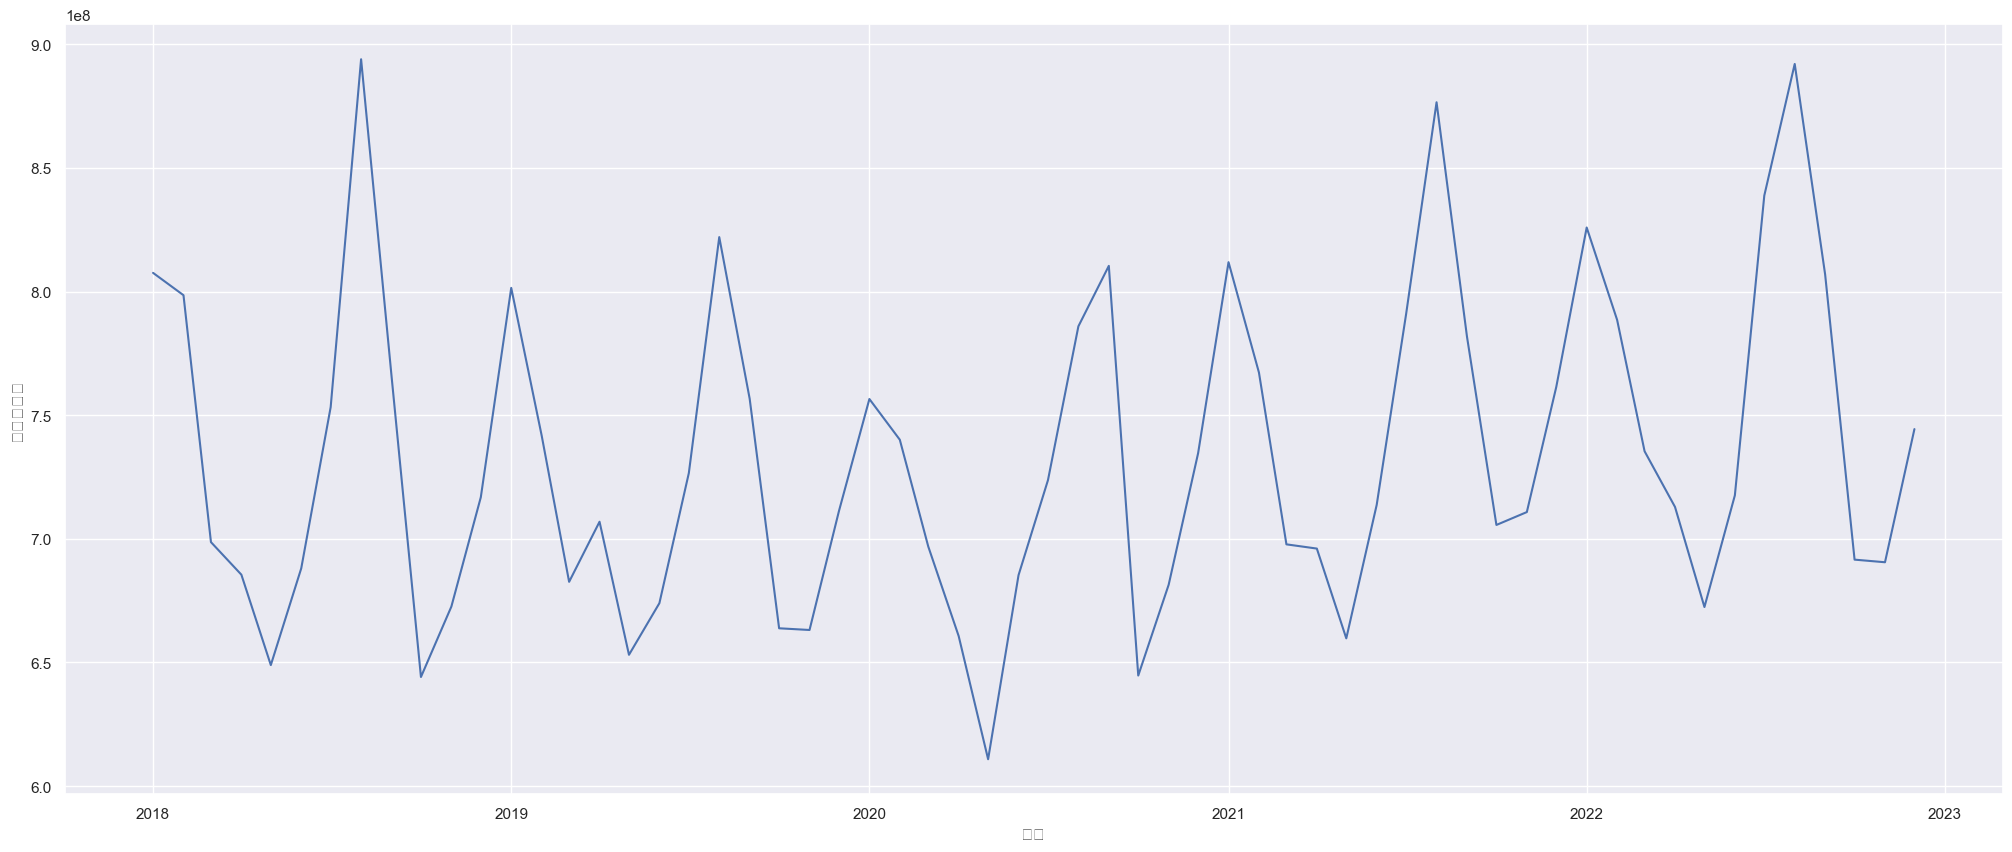

In [121]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x=tmp_elc_ohe.index , y=tmp_elc_ohe['전력사용량'])

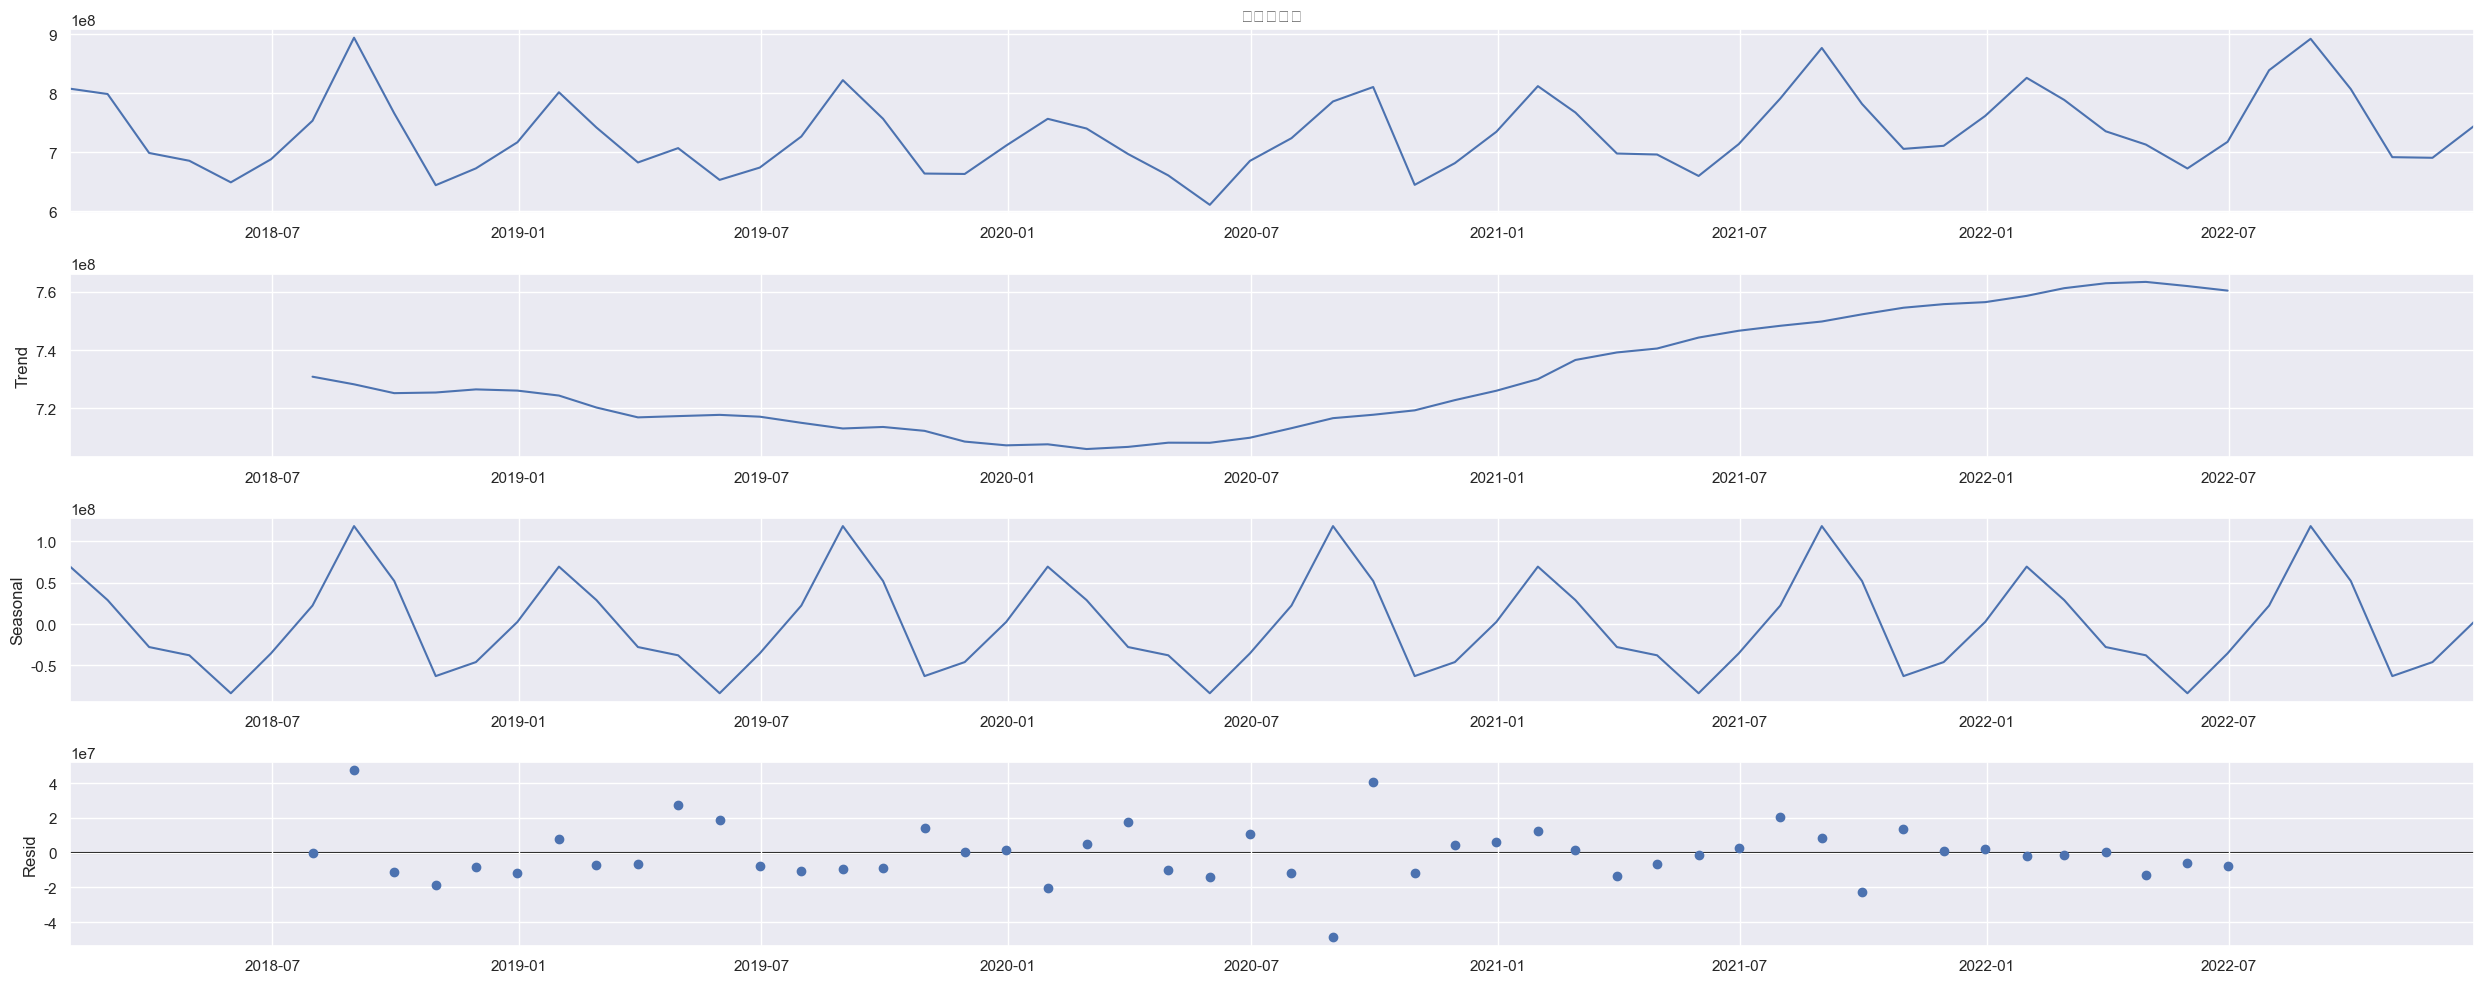

In [122]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y,model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [123]:
from statsmodels.tsa.stattools import adfuller #ADF Test를 위한 함수 호출 

st_result = adfuller(tmp_elc_ohe['전력사용량'])
print(st_result)

tmp_elc_ohe['1st diff'] = tmp_elc_ohe['전력사용량']- tmp_elc_ohe['전력사용량'].shift(1)
# Test 결과 이미 P-Velue 가 0.05 이하 임으로 시계열 데이터가 정상 상태로 판다.
# 만약 0.05 이상 이라면 차분을 통해 시계열 안정화 실시 

(0.24281124733882833, 0.9745630793869344, 11, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 1803.0248441634876)


1.6778732633068175e-07


<AxesSubplot:xlabel='일시'>

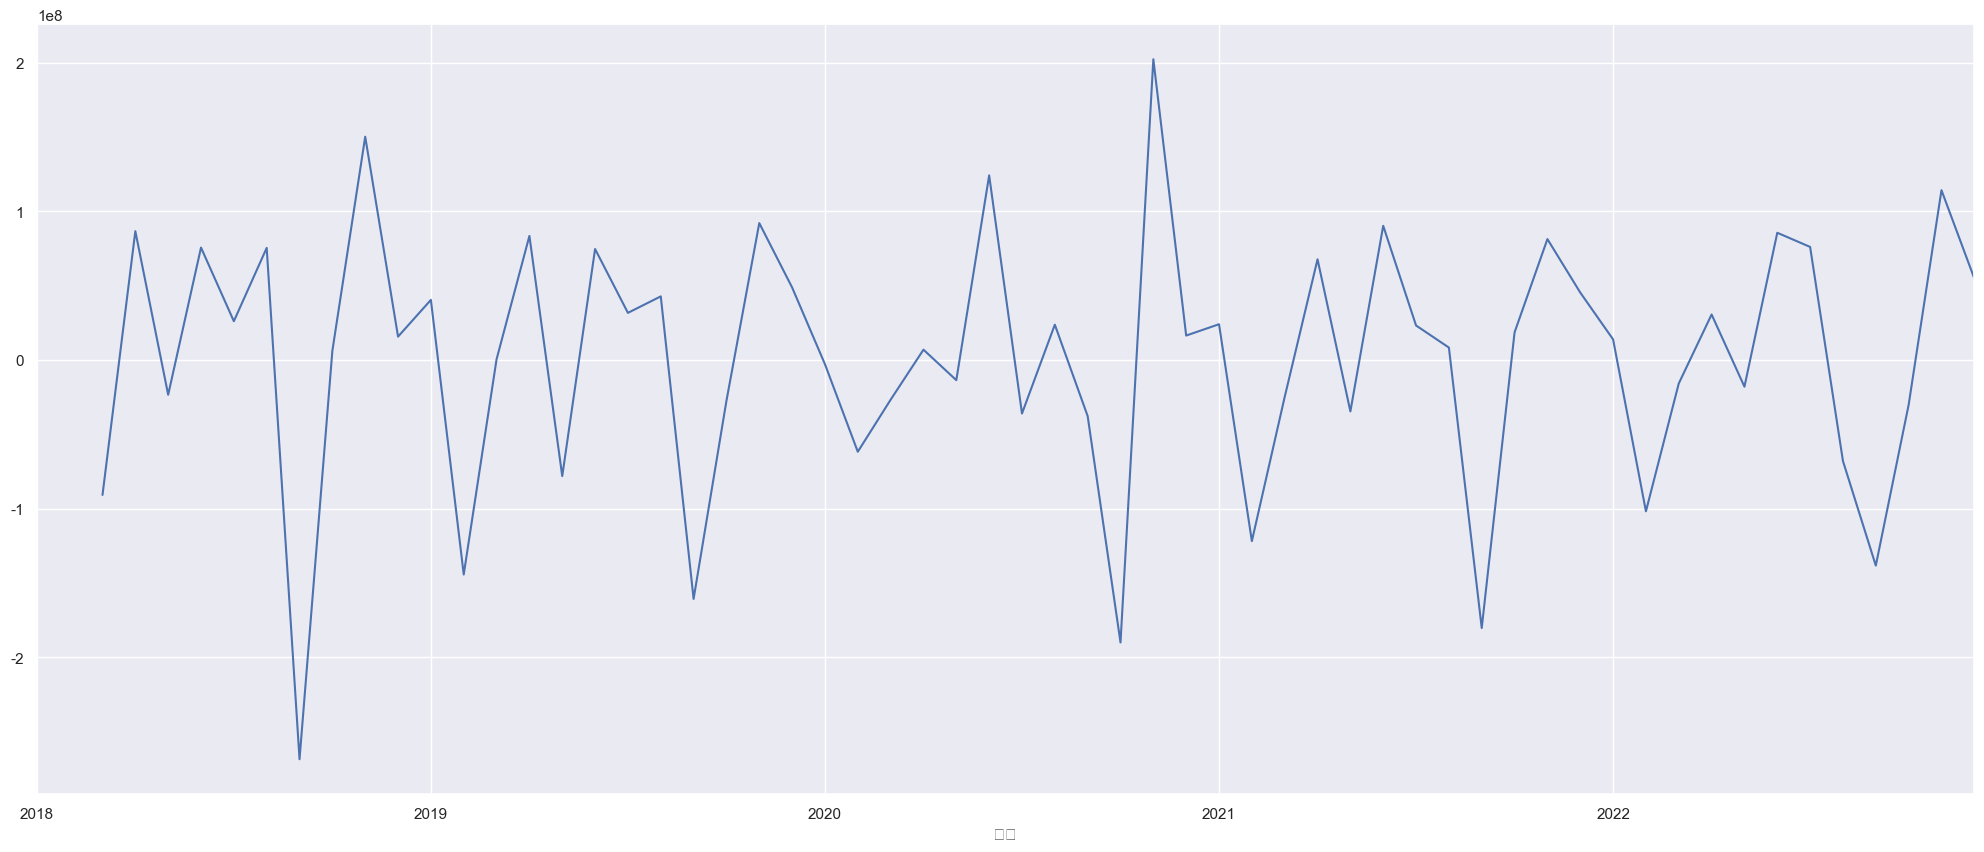

In [124]:
# diff 값으로 계절성 값 계산 

tmp_elc_ohe['seasonal diff'] = tmp_elc_ohe['1st diff'] - tmp_elc_ohe['1st diff'].shift(1)
st_result = adfuller(tmp_elc_ohe['seasonal diff'].dropna()) # 차분에 의해 발생한 Na 값을 제거 하고 진행 
print(st_result[1])
tmp_elc_ohe['seasonal diff'].plot()

# 결론적으로 ARIMA의 차분 값은 
#d = 0, D = 1 사용 

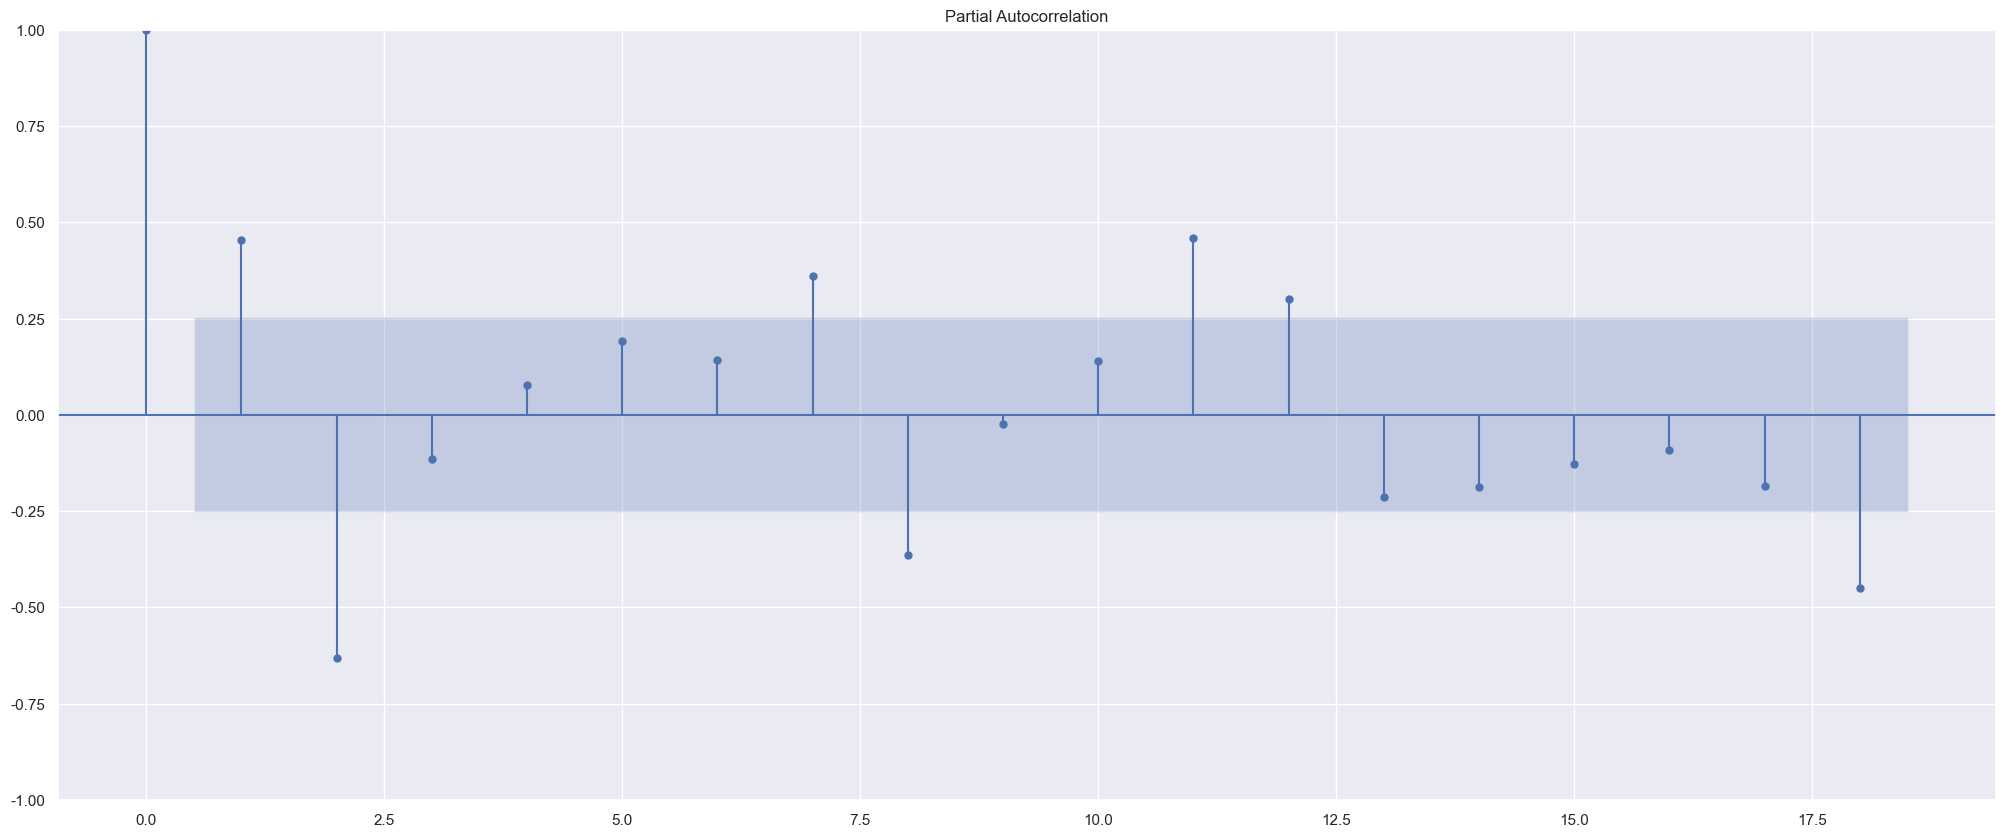

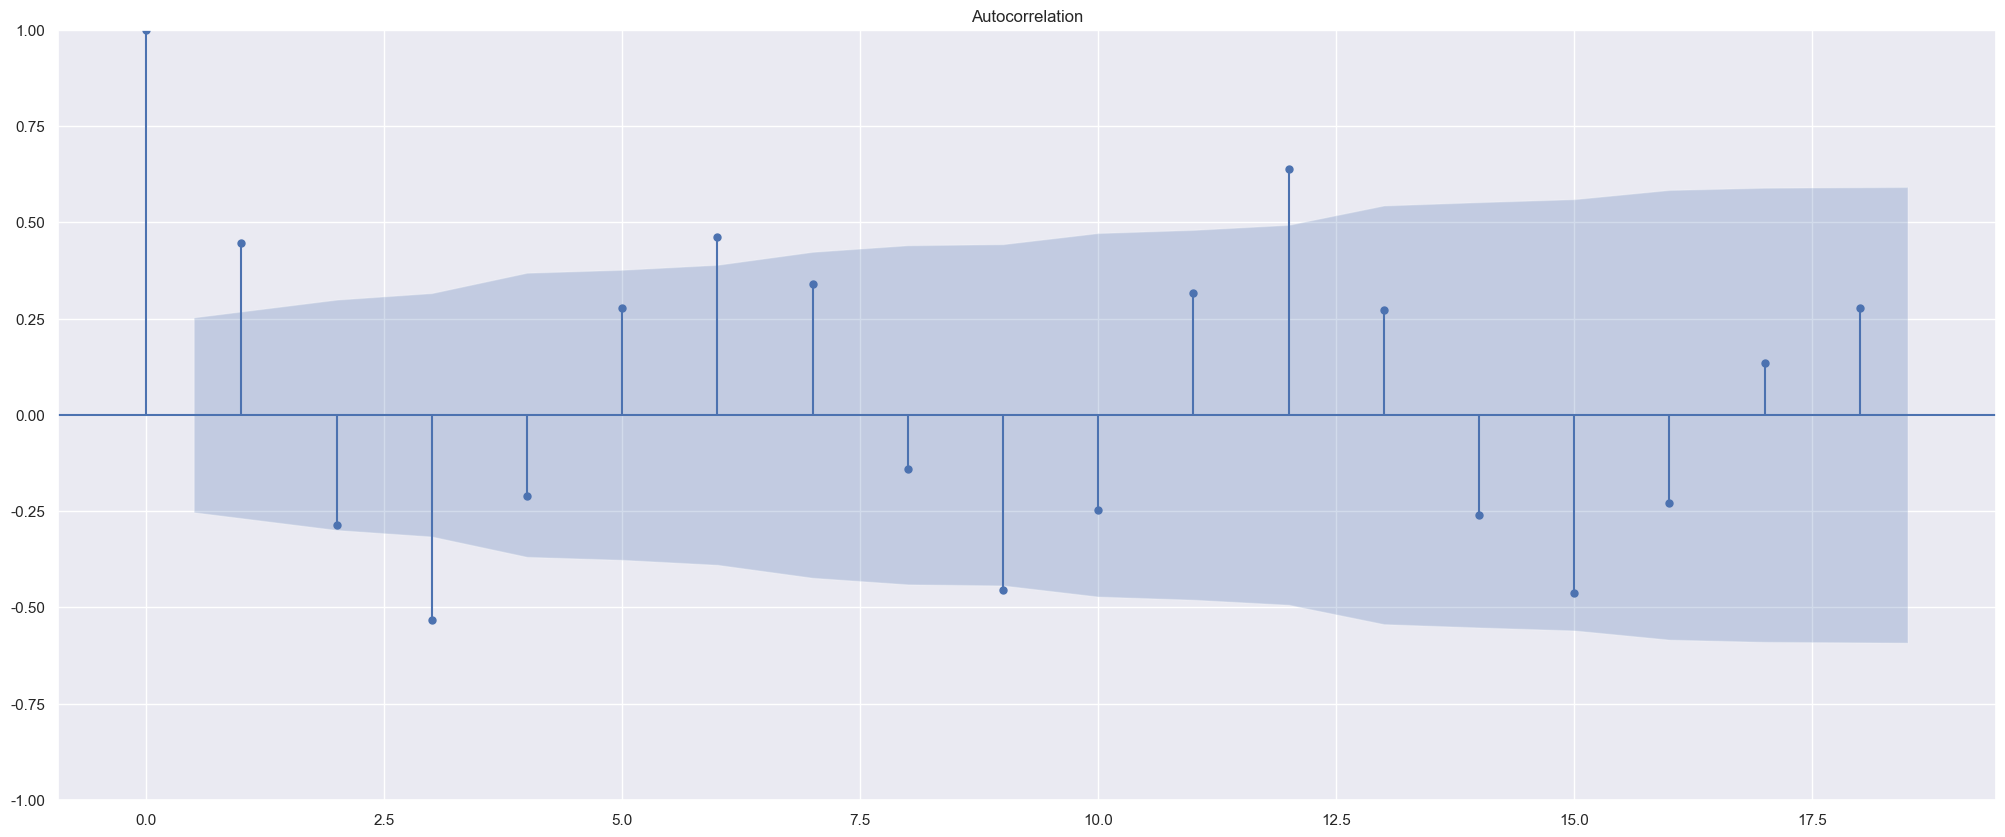

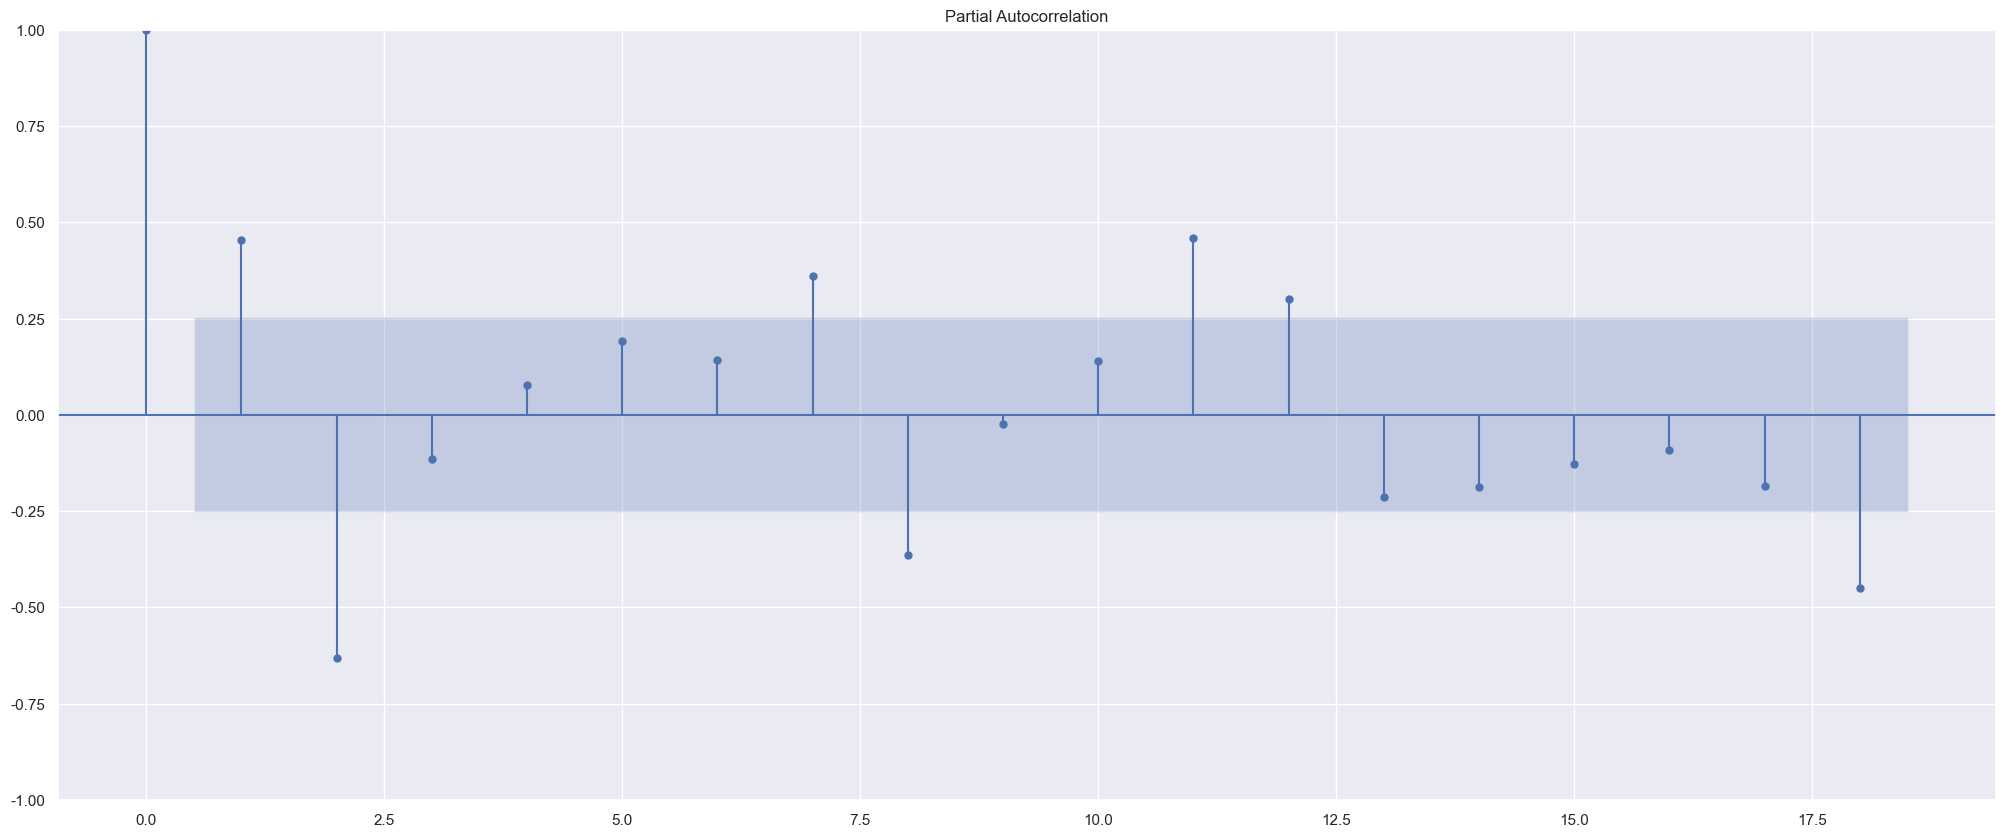

In [125]:
# ACF 그려 보기 / PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf 와 pacf 시각화를 위한 라이브러리 호출 

plot_acf(tmp_elc_ohe['전력사용량'])
plot_pacf(tmp_elc_ohe['전력사용량'])

In [126]:
# Arima 예측 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(tmp_elc_ohe['전력사용량'], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  전력사용량   No. Observations:                   60
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1142.987
Date:                Fri, 31 Mar 2023   AIC                           2289.974
Time:                        11:12:18   BIC                           2294.095
Sample:                    01-01-2018   HQIC                          2291.579
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0179      0.088      0.205      0.838      -0.154       0.189
sigma2      7.164e+15   2.58e-18   2.77e+33      0.000    7.16e+15    7.16e+15
Ljung-Box (L1) (Q):                   1.43   Jarque-

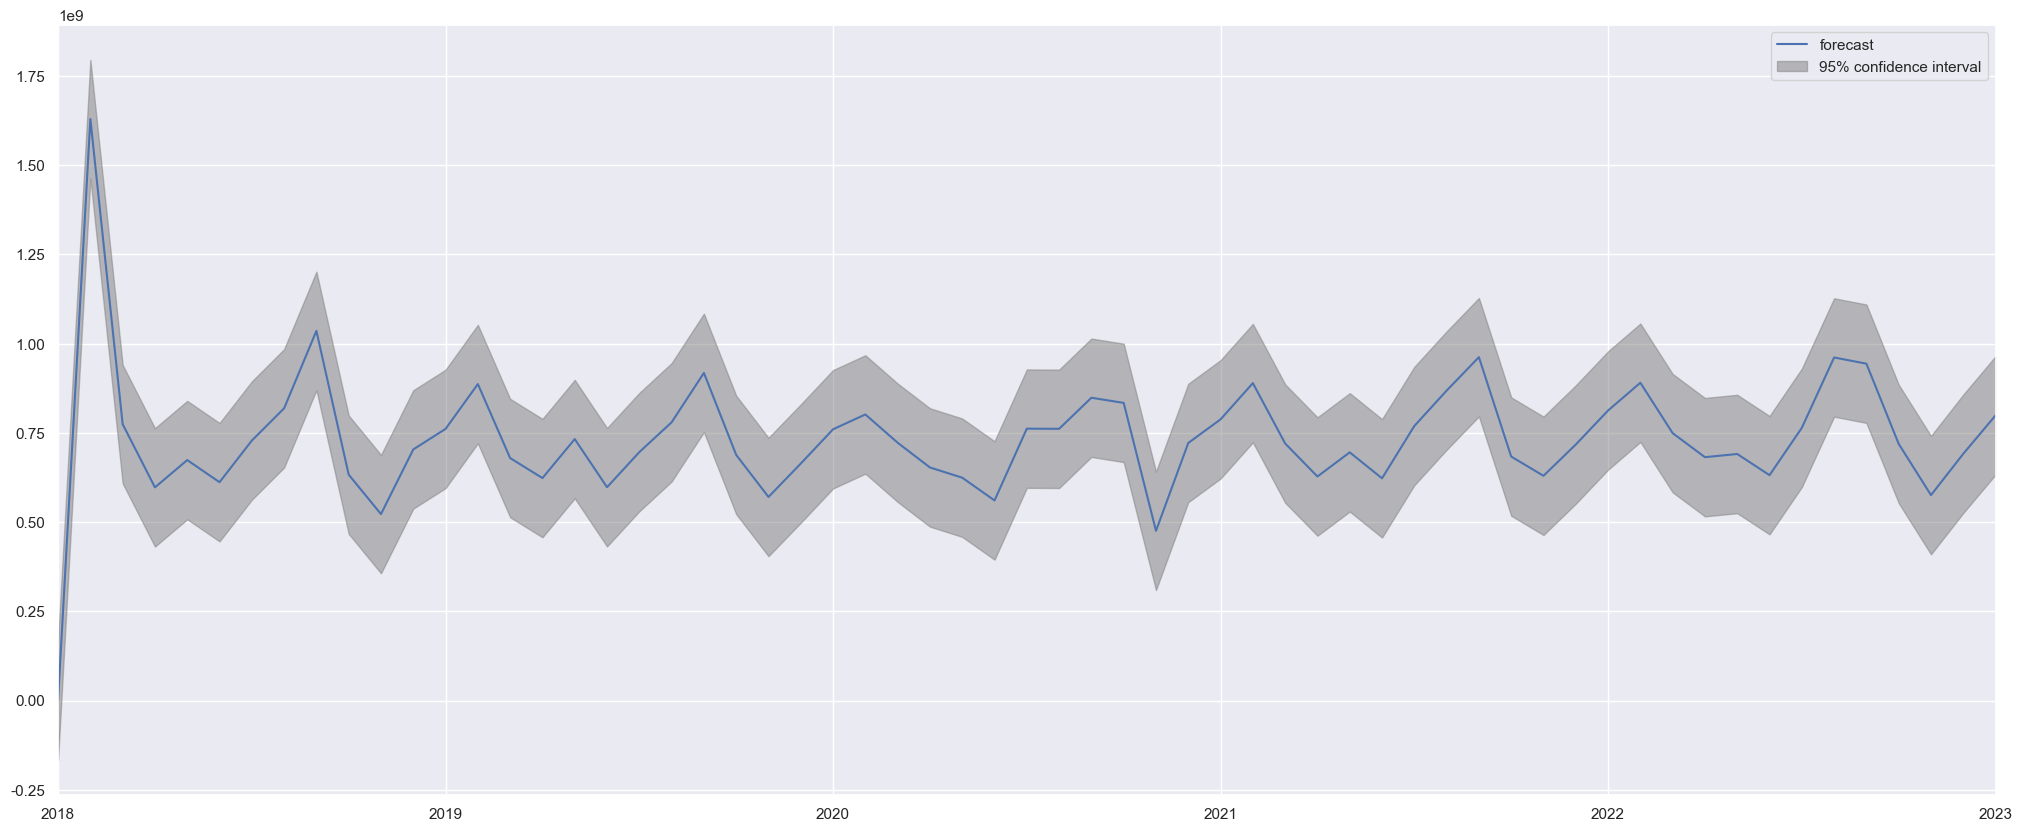

In [127]:
# 시각화 하기 
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,'2018','2023')
plt.show()